<a href="https://colab.research.google.com/github/eftekhar-hossain/Multimodal-Hateful-Memes/blob/main/hate_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Check TensorFlow version
print("TensorFlow version: ", tf.__version__)


# Check GPU information
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for device in physical_devices:
        print("Device name:", device.name)
        print("Device type:", device.device_type)
else:
    print("No GPU devices found.")


Num GPUs Available:  1
TensorFlow version:  2.15.0
Device name: /physical_device:GPU:0
Device type: GPU


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## Libraries

In [3]:
%pip install numba tensorflow==2.15 -U keras_preprocessing -U scikit-learn visual-attention-tf tensorflow-text transformers tf_transformers sentencepiece matplotlib seaborn nltk bs4 spacy openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00

In [5]:
%%time
import keras
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
from bs4 import BeautifulSoup
### ML Librarires--------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
###-------------------------------------------
from keras.utils import plot_model
np.random.seed(42)
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
main_path = "/content/drive/MyDrive/Colab Notebooks/Dataset 6200"
models_path = "/content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Models/"
results_path = "/content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Results/"
memes_path = "/content/drive/MyDrive/Colab Notebooks/Dataset 6200/6200 Memes"

CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 1.06 ms


In [6]:
from transformers import CLIPProcessor, TFAutoModel
from transformers import ViTFeatureExtractor, ViTForImageClassification, AutoTokenizer
from keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import NASNetLarge
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet121
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply, concatenate
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten,Reshape,dot,multiply
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Attention, Dot
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Nadam
keras.backend.clear_session()

ModuleNotFoundError: No module named 'keras_preprocessing'

In [ ]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


## Dataset Fetching

In [40]:
train_data = pd.read_csv(main_path + '/Train_dataset.csv')
valid_data = pd.read_csv(main_path + '/Valid_dataset.csv')
test_data = pd.read_csv(main_path + '/Test_dataset.csv')
total_data = pd.read_csv(main_path + '/Hateful_Meme.csv')

In [41]:
total_data['classLabel'].value_counts()

,count
classLabel,
Non Hateful,4050
Hateful,2149


In [43]:
import re

def detect_code_mixing(caption):
    """
    Detects code-mixing by checking if both Bangla and English words are present in the same phrase or sentence.
    """
    # Define patterns for Bangla and English words
    bangla_pattern = re.compile(r'[\u0980-\u09FF]+')  # Matches Bangla characters
    english_pattern = re.compile(r'[a-zA-Z]+')        # Matches English characters

    # Check if both Bangla and English are present
    caption = str(caption)
    contains_bangla = bool(bangla_pattern.search(caption))
    contains_english = bool(english_pattern.search(caption))

    # Code-mixing occurs when both Bangla and English words are in the same sentence or phrase
    return contains_bangla and contains_english

def detect_code_switching(caption):
    """
    Detects code-switching by checking if there are distinct segments of Bangla and English, likely separated by punctuation.
    """
    caption = str(caption)
    # Split caption by punctuation to identify distinct segments
    segments = re.split(r'[.!?।]', caption)  # Split by common sentence-ending punctuation

    contains_bangla = contains_english = False

    for segment in segments:
        # Skip empty segments
        if not segment.strip():
            continue

        # Check if the segment is Bangla or English
        if re.search(r'[\u0980-\u09FF]', segment):  # Bangla characters present
            contains_bangla = True
        elif re.search(r'[a-zA-Z]', segment):       # English characters present
            contains_english = True

        # Code-switching is detected if we find distinct Bangla and English segments
        if contains_bangla and contains_english:
            return True

    return False

def detect_bangla(caption):
    caption = str(caption)

    # Check if the caption contains only Bangla characters
    bangla_pattern = re.compile(r'^[\u0980-\u09FF\s]+$')
    return bool(bangla_pattern.match(caption))

# Example captions dataset with mixed cases
captions = [
    "This is an English sentence.",                          # No code-mixing or code-switching
    "এটি একটি বাংলা বাক্য।",                                 # No code-mixing or code-switching
    "Let's mix Bangla এবং English!",                        # Code-mixing
    "This caption includes Bangla শব্দগুলি.",               # Code-mixing
    "This is a sentence in English. এটি বাংলা বাক্য।",       # Code-switching
    "বাংলা এবং ইংরেজি মিলিয়ে লেখা।",                        # No code-mixing or code-switching
    "This is another example with English ও বাংলা",          # Code-mixing
    "English sentence. এবং এখন বাংলা বাক্য।"                # Code-switching
]

captions =  total_data[total_data['classLabel'] == 'Hateful']['imageText']

# Apply the functions to the DataFrame
total_data['is_code_mixing_hate'] = total_data[total_data['classLabel'] == 'Hateful']['imageText'].apply(detect_code_mixing)
total_data['is_code_switching_hate'] = total_data[total_data['classLabel'] == 'Hateful']['imageText'].apply(detect_code_switching)
total_data['is_bangla_hate'] = total_data[total_data['classLabel'] == 'Hateful']['imageText'].apply(detect_bangla)

print(total_data['is_code_mixing_hate'].value_counts())
print(total_data['is_code_switching_hate'].value_counts())
print(total_data['is_bangla_hate'].value_counts())

total_data['is_code_mixing_nonhate'] = total_data[total_data['classLabel'] == 'Non Hateful']['imageText'].apply(detect_code_mixing)
total_data['is_code_switching_nonhate'] = total_data[total_data['classLabel'] == 'Non Hateful']['imageText'].apply(detect_code_switching)
total_data['is_bangla_nonhate'] = total_data[total_data['classLabel'] == 'Non Hateful']['imageText'].apply(detect_bangla)

print(total_data['is_code_mixing_nonhate'].value_counts())
print(total_data['is_code_switching_nonhate'].value_counts())
print(total_data['is_bangla_nonhate'].value_counts())


is_code_mixing_hate
False    1561
True      588
Name: count, dtype: int64
is_code_switching_hate
False    2091
True       58
Name: count, dtype: int64
is_bangla_hate
False    1926
True      223
Name: count, dtype: int64
is_code_mixing_nonhate
False    2962
True     1088
Name: count, dtype: int64
is_code_switching_nonhate
False    3931
True      119
Name: count, dtype: int64
is_bangla_nonhate
False    3654
True      396
Name: count, dtype: int64


In [ ]:
# Filter memes that are 'celebrity'
celebrity_memes = total_data[total_data['targetAudience'] == 'Celebrity']

# Calculate the total number of political memes
total_celebrity_memes = len(celebrity_memes)

# Calculate the number of hateful political memes
hateful_celebrity_memes = len(celebrity_memes[celebrity_memes['classLabel'] == 'Non Hateful'])

# Calculate the percentage of hateful political memes
percentage_hateful_celebrity = (hateful_celebrity_memes / total_celebrity_memes) * 100

# Print the result
print(f"Percentage of celebrity  memes that are hateful: {percentage_hateful_celebrity:.2f}%")



# Filter memes that are 'male'
male_memes = total_data[total_data['targetAudience'] == 'Male']

# Calculate the total number of political memes
total_male_memes = len(male_memes)

# Calculate the number of hateful political memes
hateful_male_memes = len(male_memes[male_memes['classLabel'] == 'Non Hateful'])

# Calculate the percentage of hateful political memes
percentage_hateful_male = (hateful_male_memes / total_male_memes) * 100

# Print the result
print(f"Percentage of male memes that are hateful: {percentage_hateful_male:.2f}%")



# Filter memes that are 'female'
female_memes = total_data[total_data['targetAudience'] == 'Female']

# Calculate the total number of female memes
total_female_memes = len(female_memes)

# Calculate the number of hateful female memes
hateful_female_memes = len(female_memes[female_memes['classLabel'] == 'Non Hateful'])

# Calculate the percentage of hateful political memes
percentage_hateful_female = (hateful_female_memes / total_female_memes) * 100

# Print the result
print(f"Percentage of female memes that are hateful: {percentage_hateful_female:.2f}%")



# Filter memes that are 'religious'
religious_memes = total_data[total_data['targetAudience'] == 'Religious']

# Calculate the total number of political memes
total_religious_memes = len(religious_memes)

# Calculate the number of hateful political memes
hateful_religious_memes = len(religious_memes[religious_memes['classLabel'] == 'Non Hateful'])

# Calculate the percentage of hateful political memes
percentage_hateful_religious = (hateful_religious_memes / total_religious_memes) * 100

# Print the result
print(f"Percentage of religious memes that are hateful: {percentage_hateful_religious:.2f}%")



# Filter memes that are 'political'
political_memes = total_data[total_data['targetAudience'] == 'Political']

# Calculate the total number of political memes
total_political_memes = len(political_memes)

# Calculate the number of hateful political memes
hateful_political_memes = len(political_memes[political_memes['classLabel'] == 'Non Hateful'])

# Calculate the percentage of hateful political memes
percentage_hateful_political = (hateful_political_memes / total_political_memes) * 100

# Print the result
print(f"Percentage of political memes that are hateful: {percentage_hateful_political:.2f}%")

# Filter memes that are 'others'
others_memes = total_data[total_data['targetAudience'] == 'Others']

# Calculate the total number of others memes
total_others_memes = len(others_memes)

# Calculate the number of hateful others memes
hateful_others_memes = len(others_memes[others_memes['classLabel'] == 'Non Hateful'])

# Calculate the percentage of hateful political memes
percentage_hateful_others = (hateful_others_memes / total_others_memes) * 100

# Print the result
print(f"Percentage of others memes that are hateful: {percentage_hateful_others:.2f}%")

Percentage of celebrity  memes that are hateful: 59.77%
Percentage of male memes that are hateful: 63.99%
Percentage of female memes that are hateful: 38.85%
Percentage of religious memes that are hateful: 67.11%
Percentage of political memes that are hateful: 50.17%
Percentage of others memes that are hateful: 73.47%


In [ ]:
import pandas as pd
import re

# Function to check for both Bangla and English words
def contains_bangla_and_english(caption):
    bangla_pattern = re.compile(r'[\u0980-\u09FF]+')  # Matches Bengali characters
    english_pattern = re.compile(r'[a-zA-Z]+')        # Matches English characters
    has_bangla = bool(bangla_pattern.search(caption))
    has_english = bool(english_pattern.search(caption))
    return has_bangla and has_english

# Example DataFrame
data = {
    'caption': [
        "This is an example with বাংলা words.",
        "Another caption without Bangla.",
        "আরেকটি উদাহরণ বাক্য।",
        "Mixed language example with English and বাংলা.",
        "Only English words here."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Apply the function to each caption and store the result in a new column
df['contains_bangla_and_english'] = df['caption'].apply(contains_bangla_and_english)

# Display the DataFrame
print(df)


                                          caption  contains_bangla_and_english
0            This is an example with বাংলা words.                         True
1                 Another caption without Bangla.                        False
2                            আরেকটি উদাহরণ বাক্য।                        False
3  Mixed language example with English and বাংলা.                         True
4                        Only English words here.                        False


In [ ]:
train_data['classLabel'].value_counts()

classLabel
Non Hateful    1943
Hateful         540
Name: count, dtype: int64

In [ ]:
valid_data['classLabel'].value_counts()

classLabel
Hateful        925
Non Hateful    924
Name: count, dtype: int64

In [ ]:
test_data['classLabel'].value_counts()

classLabel
Non Hateful    1182
Hateful         684
Name: count, dtype: int64

In [23]:
## Replace Names
train_data['enc_label'] = train_data['classLabel'].replace({'Hateful':1,'Non Hateful':0})
valid_data['enc_label'] = valid_data['classLabel'].replace({'Hateful':1,'Non Hateful':0})
test_data['enc_label'] = test_data['classLabel'].replace({'Hateful':1,'Non Hateful':0})
total_data['enc_label'] = total_data['classLabel'].replace({'Hateful':1,'Non Hateful':0})

## Display Some Data

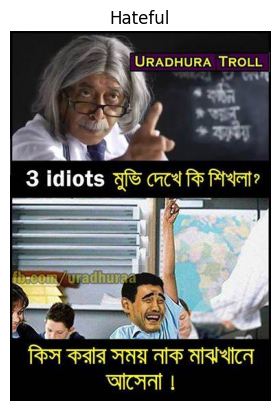

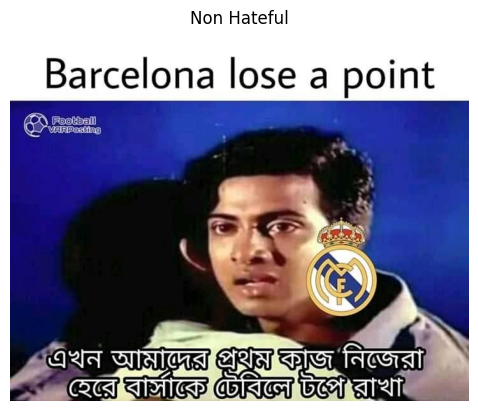

In [ ]:
from matplotlib import image as im
for i in range(2):
  data = im.imread(memes_path+'/'+ train_data['imageName'][i],0)
  plt.figure()
  plt.axis('off')
  plt.imshow(data)
  plt.title(train_data['classLabel'][i])

'Non Hateful'

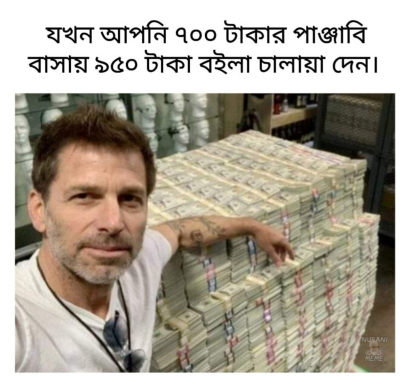

In [ ]:
n = 377
from matplotlib import image as im
data = im.imread(memes_path+'/'+ test_data['imageName'][n],0)
plt.figure()
plt.axis('off')
plt.imshow(data)
#plt.title('Human Damage')
plt.savefig(results_path+"472_negative.png",bbox_inches='tight')
test_data['classLabel'][n]

## Memes Fetching

In [29]:
## collect image names from the folders
def create_img_array(img_dirct):
    all_imgs = []
    for root, j, files in os.walk(img_dirct):
        for file in files:
            file = root + '' + file
            all_imgs.append(file)
    return all_imgs

def create_img_path(DF, Col_name, img_dir):
    img_path = [img_dir + '' + str(name) for name in DF[Col_name]]
    return img_path
def create_caption(DF,Col_name):
  caption = [str(name) for name in DF[Col_name]]
  return caption


In [ ]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 150*150*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = image.load_img(path, target_size=(150,150))
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array
    img_data = image.img_to_array(img)
    # Adding one more dimension to array
    img_data = np.expand_dims(img_data, axis=0)
    #
    img_data = preprocess_input(img_data)
    return(img_data)


### VIT 224x224x3

In [ ]:
# Function that returns image reading from the path
def get_input_vit(path):
    # Loading image from given path
    # and resizing it to 224*224*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = image.load_img(path, target_size=(224,224))
    return(img)

# Takes in image and preprocess it
def process_input_vit(img):
    # Converting image to array
    img_data = image.img_to_array(img)
    # Adding one more dimension to array
    img_data = np.expand_dims(img_data, axis=0)
    #
    img_data = preprocess_input(img_data)
    return(img_data)


In [ ]:
img_dir = memes_path+'6200 Memes/Hateful Memes/'
# Creating train, test and validation image path
train_img_path = create_img_path(train_data,'imageName', img_dir)
valid_img_path = create_img_path(valid_data,'imageName', img_dir)
test_img_path = create_img_path(test_data,'imageName', img_dir)



In [ ]:
# Create an array of training images
train_images = []
train_images_vit = []
for i in train_img_path:
  input_img = get_input(i)
  input_img_vit = get_input_vit(i)
  input_img = process_input(input_img)
  input_img_vit = process_input_vit(input_img_vit)
  train_images.append(input_img[0])
  train_images_vit.append(input_img_vit[0])

# convert into numpy array
train_image = np.array(train_images)
train_image_vit = np.array(train_images_vit)
print(train_image.shape,train_image_vit.shape)

In [ ]:
import pickle as pkl
with open(main_path+'train_image.pkl','wb') as f:
    pkl.dump(train_image, f)
with open(main_path+'train_image_vit.pkl','wb') as f:
    pkl.dump(train_image_vit, f)

In [ ]:
# Create an array of test images
valid_images = []
valid_images_vit = []
for i in valid_img_path:
  input_img = get_input(i)
  input_img_vit = get_input_vit(i)
  input_img = process_input(input_img)
  input_img_vit = process_input_vit(input_img_vit)
  valid_images.append(input_img[0])
  valid_images_vit.append(input_img_vit[0])

# convert into numpy array
valid_image = np.array(valid_images)
valid_image_vit = np.array(valid_images_vit)
print(valid_image.shape,valid_image_vit.shape)

In [ ]:
import pickle as pkl
with open(main_path+'valid_image.pkl','wb') as f:
    pkl.dump(valid_image, f)
with open(main_path+'valid_image_vit.pkl','wb') as f:
    pkl.dump(valid_image_vit, f)

In [ ]:
# Create an array of test images
test_images = []
test_images_vit = []
for i in test_img_path:
  input_img = get_input(i)
  input_img_vit = get_input_vit(i)
  input_img = process_input(input_img)
  input_img_vit = process_input_vit(input_img_vit)
  test_images.append(input_img[0])
  test_images_vit.append(input_img_vit[0])

# convert into numpy array
test_image = np.array(test_images)
test_image_vit = np.array(test_images_vit)
print(test_image.shape,test_image_vit.shape)

In [ ]:
import pickle as pkl
with open(main_path+'test_image.pkl','wb') as f:
    pkl.dump(test_image, f)
with open(main_path+'test_image_vit.pkl','wb') as f:
    pkl.dump(test_image_vit, f)

## Image Fetching

In [24]:
import pickle as pkl

## Train image
with open(main_path+'/train_image_6200.pkl','rb') as f:
  train_image = pkl.load(f)
  print("Training Images:-- ",train_image.shape)

with open(main_path+'/train_image_vit_6200.pkl','rb') as f:
  train_image_vit = pkl.load(f)
  print("Training Images for Vit:-- ",train_image_vit.shape)
## Valid image
with open(main_path+'/valid_image_6200.pkl','rb') as f:
  valid_image = pkl.load(f)
  print("Valid Images:-- ",valid_image.shape)

with open(main_path+'/valid_image_vit_6200.pkl','rb') as f:
  valid_image_vit = pkl.load(f)
  print("Valid Images for Vit:-- ",valid_image_vit.shape)

## Test image
with open(main_path+'/test_image_6200.pkl','rb') as f:
  test_image = pkl.load(f)
  print("Test Images:-- ",test_image.shape)

with open(main_path+'/test_image_vit_6200.pkl','rb') as f:
  test_image_vit = pkl.load(f)
  print("Test Images for Vit:-- ",test_image_vit.shape)

Training Images:--  (2483, 150, 150, 3)


KeyboardInterrupt: 

## Captions Cleaning

In [25]:
stp_path = '/home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/'
stp = open(stp_path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/bangla_stopwords.txt'

In [32]:
'''
Text Cleaning
'''
def text_cleaning(row):
  if not isinstance(row, str):
        return ""
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  post = post.replace('।', ' ')
  post = post.replace(',',' ')
  post = post.replace(':',' ')
  post = post.replace('?',' ')
  post = post.replace('!',' ')
  post = post.replace('.',' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower()
  # Stopword
  #result = text.split()
  #text = [word.strip() for word in result if word not in stp ]
  #text =" ".join(text)

  return text

In [19]:
total_data

,_id,imageUrl,imageName,imageText,Banglish,classLabel,targetAudience,is_code_mixing,is_code_switching,is_bangla,enc_label
0,657bfca5a815700d77255847,https://firebasestorage.googleapis.com/v0/b/th...,KAM (254).jpg,"3 idiots মুভি দেখে কি শিখলা ? , কিস করার সময় ন...","3 idiots movie dekhe ki sikhla?,kiss korar som...",Hateful,Others,True,False,False,1
1,6545528d3e91a186aaad1921,https://firebasestorage.googleapis.com/v0/b/th...,tangaila (177).jpg,"Barcelona, lose, a, point, এখন, আমাদের, প্রথম,...","Barcelona,lose,a,point,ekhon,amader,kaj,holo,n...",Non Hateful,Celebrity,True,False,False,0
2,654d6183358459c1de8e8184,https://firebasestorage.googleapis.com/v0/b/th...,tangaila (53).jpg,"Random, uncle, aunty, in, every, family, event...","Random, uncle,aunty,in,every, family,event,am...",Non Hateful,Others,True,False,False,0
3,6545006c95c9518762f06ee1,https://firebasestorage.googleapis.com/v0/b/th...,Rantages(400).jpg,"Shakib, gives, a, flying, kiss, towards, the, ...","Shakib,gives,a,flying, kiss,towards,the, gall...",Non Hateful,Celebrity,False,False,False,0
4,652d8fac334041ff4af55b47,https://firebasestorage.googleapis.com/v0/b/th...,reddit(9).jpg,"আজকের, পর থেকে, তোমাকে, যেন, অইটার, সাথে, খেল...","ajker, por theke, tomake, jeno, oitar, sathe, ...",Non Hateful,Others,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
6194,65657ef6a1911bb06519fa3a,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (559).jpg,"বাঙালিও কী রক শুনতে শিখেছে?, সত্যিই তুমি পারল...","bangali o ki rock shunte shikheche?, shotti e ...",Non Hateful,Celebrity,False,False,False,0
6195,65657f43a1911bb06519fa3c,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (151).jpg,ভাই সব জায়গার লোম উঠেছে তো??,bhai shob jaygar lom utheche to?,Hateful,Others,False,False,False,1
6196,65657f5ea1911bb06519fa3e,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (342).jpg,"Alexa, play a song, মাতাল হয়ে হিসু করব দেওয়ালে...","Alexa, play a song, matal hoye hishu korbo dew...",Hateful,Celebrity,True,False,False,1
6197,65657f8ea1911bb06519fa40,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (228).jpg,"Statue of "" এয়েচো?""","Statue of "" eyecho?""",Hateful,Celebrity,True,False,False,1


In [33]:
#Removing punctuations
train_data['cleaned'] = train_data['imageText'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['imageText'].apply(text_cleaning)
test_data['cleaned'] = test_data['imageText'].apply(text_cleaning)
total_data['cleaned'] = total_data['imageText'].apply(text_cleaning)

train_caption = create_caption(train_data,'cleaned')
valid_caption = create_caption(valid_data,'cleaned')
test_caption = create_caption(test_data,'cleaned')
print(train_caption)
## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(100):
  print("Original Data:===\n",train_data.imageText[i],"\nCleaned Data:===\n",train_data.cleaned[i], "\nLabel:== ",train_data.classLabel[i])

['3 idiots মুভি দেখে কি শিখলা কিস করার সময় নাক মাঝখানে আসেনা', 'barcelona lose a point এখন আমাদের প্রথম কাজ নিজেরা হেরে বার্সাকে টপে রাখা', 'random uncle aunty in every family event আমি তোমাকে একটা ইন্টালেকচুয়াল কোয়েশ্চেন করতে চাই', 'shakib gives a flying kiss towards the gallery yaay shakib kissed us no you fucktards he kissed me', 'আজকের পর থেকে তোমাকে যেন অইটার সাথে খেলা করতে না দেখি', 'আমি গুম কে গুম বলি না হারিয়ে যাওয়া বলি আমি ফকিরের ছেলে ক্র ফকিরের ছেলে বলি না ফইন্নির পুত বলি', 'এলাকার বড় ভাই কইট্রা কলেজের ক্রাশ', 'খেতে বসে আমি যখন এক পিসের জায়গায় দুই পিস মাছ নেই বড় ভাই to me oye wapas rakh use', 'চলে এলাম', 'ডাক্তার সাব আমারে বাচাঁন আমি ঘুমাইলে চোখে দেখি না খাইলে ক্ষুদা লাগে না আপনি রোজ সকালে একটা ছাগলের ডিম আর এক গ্লাস মুরগির দুধ খাবেন তাহলে ঠিক হয়ে যাবেন', 'ঢাবিতে প্রশ্নফাস জাবীর ছাত্রীদের নিয়ে অশালীন মন্তব্য সাস্টে বোমা হামলা ১২২ ঘন্টা ধরে ২৪ জনকে মৃত্যুর কোলে ফেলে দেয়া ফরিদ', 'পেইজের মাধ্যমে লেটেস্ট খবর টাংগাইলের জনগণ টাংগাইল সারকাজম পেইজের এডমিন', 'বর্ষা আমার প্রিয় ঋতু s

## One Hot Encoding

In [34]:
encoder=OneHotEncoder()

encoded_labels = pd.DataFrame (encoder.fit_transform(total_data[['classLabel']]).toarray())

encoded_labels.columns = encoder.get_feature_names_out(['classLabel'])

total_data= pd.concat([total_data, encoded_labels ], axis=1)

In [35]:
total_data.columns

Index(['_id', 'imageUrl', 'imageName', 'imageText', 'Banglish', 'classLabel',
       'targetAudience', 'enc_label', 'cleaned', 'classLabel_Hateful',
       'classLabel_Non Hateful'],
      dtype='object')

In [36]:
total_data = total_data.rename(columns={'classLabel_Hateful':'Hate',
                                        'classLabel_Non Hateful':'Not-Hate'
                                       })

In [37]:
total_data

,_id,imageUrl,imageName,imageText,Banglish,classLabel,targetAudience,enc_label,cleaned,Hate,Not-Hate
0,657bfca5a815700d77255847,https://firebasestorage.googleapis.com/v0/b/th...,KAM (254).jpg,"3 idiots মুভি দেখে কি শিখলা ? , কিস করার সময় ন...","3 idiots movie dekhe ki sikhla?,kiss korar som...",Hateful,Others,1,3 idiots মুভি দেখে কি শিখলা কিস করার সময় নাক ম...,1.0,0.0
1,6545528d3e91a186aaad1921,https://firebasestorage.googleapis.com/v0/b/th...,tangaila (177).jpg,"Barcelona, lose, a, point, এখন, আমাদের, প্রথম,...","Barcelona,lose,a,point,ekhon,amader,kaj,holo,n...",Non Hateful,Celebrity,0,barcelona lose a point এখন আমাদের প্রথম কাজ নি...,0.0,1.0
2,654d6183358459c1de8e8184,https://firebasestorage.googleapis.com/v0/b/th...,tangaila (53).jpg,"Random, uncle, aunty, in, every, family, event...","Random, uncle,aunty,in,every, family,event,am...",Non Hateful,Others,0,random uncle aunty in every family event আমি ত...,0.0,1.0
3,6545006c95c9518762f06ee1,https://firebasestorage.googleapis.com/v0/b/th...,Rantages(400).jpg,"Shakib, gives, a, flying, kiss, towards, the, ...","Shakib,gives,a,flying, kiss,towards,the, gall...",Non Hateful,Celebrity,0,shakib gives a flying kiss towards the gallery...,0.0,1.0
4,652d8fac334041ff4af55b47,https://firebasestorage.googleapis.com/v0/b/th...,reddit(9).jpg,"আজকের, পর থেকে, তোমাকে, যেন, অইটার, সাথে, খেল...","ajker, por theke, tomake, jeno, oitar, sathe, ...",Non Hateful,Others,0,আজকের পর থেকে তোমাকে যেন অইটার সাথে খেলা করতে ...,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6194,65657ef6a1911bb06519fa3a,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (559).jpg,"বাঙালিও কী রক শুনতে শিখেছে?, সত্যিই তুমি পারল...","bangali o ki rock shunte shikheche?, shotti e ...",Non Hateful,Celebrity,0,বাঙালিও কী রক শুনতে শিখেছে সত্যিই তুমি পারলে ব...,0.0,1.0
6195,65657f43a1911bb06519fa3c,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (151).jpg,ভাই সব জায়গার লোম উঠেছে তো??,bhai shob jaygar lom utheche to?,Hateful,Others,1,ভাই সব জায়গার লোম উঠেছে তো,1.0,0.0
6196,65657f5ea1911bb06519fa3e,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (342).jpg,"Alexa, play a song, মাতাল হয়ে হিসু করব দেওয়ালে...","Alexa, play a song, matal hoye hishu korbo dew...",Hateful,Celebrity,1,alexa play a song মাতাল হয়ে হিসু করব দেওয়ালে য...,1.0,0.0
6197,65657f8ea1911bb06519fa40,https://firebasestorage.googleapis.com/v0/b/th...,ovodro_img (228).jpg,"Statue of "" এয়েচো?""","Statue of "" eyecho?""",Hateful,Celebrity,1,statue of এয়েচো,1.0,0.0


## Dataset Statistics

In [38]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())


lables = ['Hate','Not-Hate']
# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1].cleaned) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
        counts[word] = counts.get(word, 0)+1
      # sort the dictionary of word list
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    print(f"\nClass Name:--> {l} ")
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Maximum Caption length: {}".format(max(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Minimum Caption length: {}".format(min(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print(color.BOLD+"\nMost Frequent Words:\n"+color.END)
    for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))


In [39]:
dataset_statistics(total_data)


Class Name:--> Hate 
Number of Words:29245
Number of Unique Words:9251
Maximum Caption length: 186
Minimum Caption length: 0
Average Words in texts: 13.608655188459748

Most Frequent Words:

না	464
আমি	320
আমার	250
কি	228
আর	204
যখন	195
তো	178
করে	173
তোমার	132
the	126

Class Name:--> Not-Hate 
Number of Words:50215
Number of Unique Words:13223
Maximum Caption length: 241
Minimum Caption length: 0
Average Words in texts: 12.398765432098765

Most Frequent Words:

না	678
আমি	630
আমার	463
যখন	404
you	360
কি	352
me	318
করে	290
the	275
a	274


In [ ]:
### Plot a Distribution
def sentence_length_per_class(dataset,set_name):
  label = dataset[['Hate','Not-Hate']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l

  labelsplt = ['Hate','Not-Hate' ]
  color = ['red','green']
  bins = [1,5,10,15,20,25,30,35,40,45,50,55,60]
  plt.figure(figsize=(5,3))
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 40, 0, 800])
  plt.xlabel('Length of the Caption')
  plt.ylabel('Number of Captions ')
  plt.legend()
  #plt.savefig(results_path+'length-dist.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()


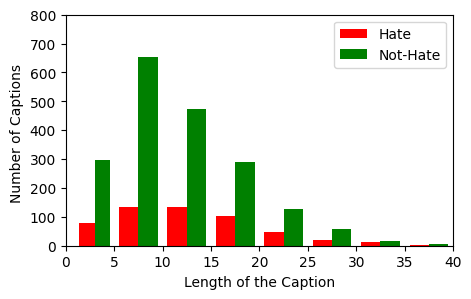

In [ ]:
sentence_length_per_class(train_data,'Training')

## Jacard Similarity

In [ ]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())

lables = ['Hate','Not-Hate']
# Count number of unique words in each set

final_list = []

for l in lables:
  label_wise_word_list = []
  word_list = [word.strip() for t in list(train_data[train_data[l]==1].cleaned) for word in t.strip().split()]
  counts = dict()
  for word in word_list:
      counts[word] = counts.get(word,0) + 1
      # sort the dictionary of word list
  ordered = sorted(counts.items(), key= lambda item: item[1], reverse = True)
  print(f"\nClass Name:--> {l} ")

  for k,v in ordered[:400]:
    label_wise_word_list.append(k)

  final_list.append(label_wise_word_list)


Class Name:--> Hate 

Class Name:--> Not-Hate 


In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
jaccard_similarity(final_list[0],final_list[1])

0.40350877192982454

## Scatter Plot

In [ ]:
%pip install texthero

In [ ]:
import texthero as hero

In [ ]:
train_data['tfidf'] = (hero.tfidf(train_data['cleaned'], max_features=500))
train_data[["tfidf", "Label"]].head(2)

In [ ]:
train_data['pca'] = hero.pca(train_data['tfidf'])
hero.scatterplot(train_data, col='pca', color='Label', title="PCA Multimodal Hate")

## Evaluation Metrics

In [ ]:
'''Evaluation Parameters'''

def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,target_names=['not-hate','hate']))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

## Callbacks

In [ ]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_with_garbage(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  # Garbage Collector - use it like gc.collect()
  import gc
  # Custom Callback To Include in Callbacks List At Training Time
  class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()


  acc_callback = myCallback()
  gc_callback = GarbageCollectorCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, gc_callback, checkpoint]

  return callback_list

In [ ]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_check(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, checkpoint]

  return callback_list

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_data['enc_label']),
                                        y = train_data['enc_label']
                                    )
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 0.6389603705609882, 1: 2.299074074074074}

## Visual Modality

In [ ]:
def visual_models(pretrained_model):
  '''
      Input: Pretrained Models weight
  '''
  base_model = pretrained_model
  base_model.trainable = False
  y = base_model.output
  pool = GlobalAveragePooling2D()(y)
  #flatten = Flatten()(pool)
  output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=output)

  return img_model

In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
nasnet = NASNetLarge(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
inceptionv3 = InceptionV3(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
inceptionresnetv2 = InceptionResNetV2(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

219055592/219055592 [==============================] - 6s 0us/step


## ViT

In [ ]:
pip install vit-keras tensorflow_addons opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
from vit_keras import vit, utils
from keras.utils import CustomObjectScope
import numpy as np
import tensorflow_addons as tfa

In [ ]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [ ]:
#Define the model
model = vit.vit_b16(
image_size=224,
activation='sigmoid',
pretrained=True,  # Set to True to use a pre-trained model
include_top=True,
pretrained_top=False,  # Set to True to use pre-trained top layers
classes=1  # Number of classes for classification
)


347502902/347502902 [==============================] - 6s 0us/step


In [ ]:
 # Compile the model
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
  metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 14, 14, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 196, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 197, 768)          768       
                                                                 
 Transformer/posembed_input  (None, 197, 768)          151296    
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 197, 768),        7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [ ]:
keras.backend.clear_session()
model.fit(x=train_image_vit,
          y=train_data['enc_label'],
          epochs=15,
          batch_size =4,
          validation_data = (valid_image_vit,valid_data['enc_label']),
          verbose = 1,
          class_weight = weight,
          callbacks = callbacks_check('vit')
          )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 0.8225 - accuracy: 0.4917
Epoch 1: val_accuracy improved from -inf to 0.49973, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Modelsvit.h5
621/621 [==============================] - 248s 323ms/step - loss: 0.8225 - accuracy: 0.4917 - val_loss: 0.6942 - val_accuracy: 0.4997
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.4857
Epoch 2: val_accuracy improved from 0.49973 to 0.50027, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Modelsvit.h5
621/621 [==============================] - 243s 391ms/step - loss: 0.7291 - accuracy: 0.4857 - val_loss: 0.7257 - val_accuracy: 0.5003
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 0.7063 - accuracy: 0.5215
Epoch 3: val_accuracy did not improve from 0.50027
621/621 [==============================] - 165s 266ms/step - loss: 0.7063 - accuracy: 0.5215 - val_loss:

In [ ]:
# Define the custom object scope
with CustomObjectScope({'ClassToken': vit.layers.ClassToken}):
    # Load the model
    model = load_model(models_path+"Modelsvit.h5")

pred = model.predict(test_image_vit)
y_pred = (pred>0.5).astype(int)
y_pred

59/59 [==============================] - 29s 389ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[1182    0]
 [ 684    0]]
              precision    recall  f1-score   support

    not-hate       0.63      1.00      0.78      1182
        hate       0.00      0.00      0.00       684

    accuracy                           0.63      1866
   macro avg       0.32      0.50      0.39      1866
weighted avg       0.40      0.63      0.49      1866

Accuracy :  0.6334405144694534
Precison :  0.4012468853713258
Recall :  0.6334405144694534
F1 :  0.4912904777578044


## NASNET

In [ ]:
strategy = tf.distribute.MirroredStrategy()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [ ]:
nasnet_model = visual_models(nasnet)
nasnet_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
nasnet_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size = 4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('nasnet_6200'))

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 1.2806 - accuracy: 0.4954
Epoch 1: val_accuracy improved from -inf to 0.50027, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Models/nasnet_6200.h5
621/621 [==============================] - 110s 142ms/step - loss: 1.2806 - accuracy: 0.4954 - val_loss: 1.9893 - val_accuracy: 0.5003
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 1.1165 - accuracy: 0.5417
Epoch 2: val_accuracy improved from 0.50027 to 0.53434, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Models/nasnet_6200.h5
621/621 [==============================] - 102s 164ms/step - loss: 1.1165 - accuracy: 0.5417 - val_loss: 1.0691 - val_accuracy: 0.5343
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.5630
Epoch 3: val_accuracy did not improve from 0.53434
621/621 [==============================] - 75s 120ms/step - loss: 1.0812 - accuracy: 0

In [ ]:
 # Prediction
model = load_model(models_path+"nasnet_6200.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

59/59 [==============================] - 22s 216ms/step


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[494 688]
 [252 432]]
              precision    recall  f1-score   support

    not-hate       0.66      0.42      0.51      1182
        hate       0.39      0.63      0.48       684

    accuracy                           0.50      1866
   macro avg       0.52      0.52      0.50      1866
weighted avg       0.56      0.50      0.50      1866

Accuracy :  0.4962486602357985
Precison :  0.5608505198757174
Recall :  0.4962486602357985
F1 :  0.5001638320923993


## INCEPTIONV3

In [ ]:
inceptionv3_model = visual_models(inceptionv3)
inceptionv3_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
inceptionv3_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('inceptionv3_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 7.1137 - accuracy: 0.4901
Epoch 1: val_accuracy improved from -inf to 0.53380, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/inceptionv3_6200.h5
621/621 [==============================] - 29s 41ms/step - loss: 7.1137 - accuracy: 0.4901 - val_loss: 7.0138 - val_accuracy: 0.5338
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 5.6320 - accuracy: 0.5614
Epoch 2: val_accuracy did not improve from 0.53380
621/621 [==============================] - 20s 32ms/step - loss: 5.6320 - accuracy: 0.5614 - val_loss: 4.7790 - val_accuracy: 0.5057
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 5.5717 - accuracy: 0.5844
Epoch 3: val_accuracy did not improve from 0.53380
621/621 [==============================] - 20s 32ms/step - loss: 5.5717 - accuracy: 0.5844 - val_loss: 7.8397 - val_accuracy: 0.5041
Epoch 4/15
621/621 [==============================] - ETA: 0s -

In [ ]:
 # Prediction
model = load_model(models_path+"inceptionv3_6200.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

59/59 [==============================] - 5s 48ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[790 392]
 [455 229]]
              precision    recall  f1-score   support

    not-hate       0.63      0.67      0.65      1182
        hate       0.37      0.33      0.35       684

    accuracy                           0.55      1866
   macro avg       0.50      0.50      0.50      1866
weighted avg       0.54      0.55      0.54      1866

Accuracy :  0.5460878885316184
Precison :  0.5371146733352161
Recall :  0.5460878885316184
F1 :  0.5410227084121682


## InceptionResNetV2

In [ ]:
inceptionresnetv2_model = visual_models(inceptionresnetv2)
inceptionresnetv2_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
inceptionresnetv2_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('inceptionresnetv2_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 19.8127 - accuracy: 0.5449
Epoch 1: val_accuracy improved from -inf to 0.49648, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/inceptionresnetv2_6200.h5
621/621 [==============================] - 57s 75ms/step - loss: 19.8127 - accuracy: 0.5449 - val_loss: 11.0104 - val_accuracy: 0.4965
Epoch 2/15
620/621 [============================>.] - ETA: 0s - loss: 18.1389 - accuracy: 0.5077
Epoch 2: val_accuracy improved from 0.49648 to 0.52893, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/inceptionresnetv2_6200.h5
621/621 [==============================] - 42s 68ms/step - loss: 18.1236 - accuracy: 0.5075 - val_loss: 11.5435 - val_accuracy: 0.5289
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 13.3140 - accuracy: 0.5147
Epoch 3: val_accuracy did not improve from 0.52893
621/621 [==============================] - 41s 66ms/step - loss: 13.3140 - ac

In [ ]:
 # Prediction
model = load_model(models_path+"inceptionresnetv2_6200.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

59/59 [==============================] - 7s 65ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[ 179 1003]
 [  82  602]]
              precision    recall  f1-score   support

    not-hate       0.69      0.15      0.25      1182
        hate       0.38      0.88      0.53       684

    accuracy                           0.42      1866
   macro avg       0.53      0.52      0.39      1866
weighted avg       0.57      0.42      0.35      1866

Accuracy :  0.41854233654876744
Precison :  0.5719169073895803
Recall :  0.41854233654876744
F1 :  0.34996099558476035


## VGG19

In [ ]:
vgg19_model = visual_models(vgg19)
vgg19_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
vgg19_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg19_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 2.1141 - accuracy: 0.5429
Epoch 1: val_accuracy improved from -inf to 0.54462, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Models/vgg19_6200.h5
621/621 [==============================] - 39s 57ms/step - loss: 2.1141 - accuracy: 0.5429 - val_loss: 1.5185 - val_accuracy: 0.5446
Epoch 2/15
620/621 [============================>.] - ETA: 0s - loss: 1.2687 - accuracy: 0.5738
Epoch 2: val_accuracy did not improve from 0.54462
621/621 [==============================] - 23s 38ms/step - loss: 1.2675 - accuracy: 0.5739 - val_loss: 1.7361 - val_accuracy: 0.5084
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 0.9693 - accuracy: 0.6089
Epoch 3: val_accuracy did not improve from 0.54462
621/621 [==============================] - 23s 37ms/step - loss: 0.9693 - accuracy: 0.6089 - val_loss: 1.2210 - val_accuracy: 0.5381
Epoch 4/15
621/621 [==============================] - ETA: 0s

In [ ]:
 # Prediction
model = load_model(models_path+"vgg19_6200.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

59/59 [==============================] - 10s 110ms/step


array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[642 540]
 [343 341]]
              precision    recall  f1-score   support

    not-hate       0.65      0.54      0.59      1182
        hate       0.39      0.50      0.44       684

    accuracy                           0.53      1866
   macro avg       0.52      0.52      0.51      1866
weighted avg       0.55      0.53      0.54      1866

Accuracy :  0.5267952840300107
Precison :  0.5547423090539471
Recall :  0.5267952840300107
F1 :  0.5350691509778449


## VGG16

In [ ]:
keras.backend.clear_session()
vgg16_model = visual_models(vgg16)
vgg16_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
vgg16_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg16_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 2.3968 - accuracy: 0.5558
Epoch 1: val_accuracy improved from -inf to 0.51433, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Models/vgg16_6200.h5
621/621 [==============================] - 34s 40ms/step - loss: 2.3968 - accuracy: 0.5558 - val_loss: 2.0049 - val_accuracy: 0.5143
Epoch 2/15
619/621 [============================>.] - ETA: 0s - loss: 1.5274 - accuracy: 0.5872
Epoch 2: val_accuracy did not improve from 0.51433
621/621 [==============================] - 21s 33ms/step - loss: 1.5243 - accuracy: 0.5880 - val_loss: 1.7598 - val_accuracy: 0.5095
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 1.2294 - accuracy: 0.6238
Epoch 3: val_accuracy improved from 0.51433 to 0.52028, saving model to /content/drive/MyDrive/Colab Notebooks/Dataset 6200/HatMeme/Models/vgg16_6200.h5
621/621 [==============================] - 19s 31ms/step - loss: 1.2294 - accuracy: 0.6238 -

In [ ]:
 # Prediction
model = load_model(models_path+"vgg16_6200.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)

59/59 [==============================] - 9s 94ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[692 490]
 [390 294]]
              precision    recall  f1-score   support

    not-hate       0.64      0.59      0.61      1182
        hate       0.38      0.43      0.40       684

    accuracy                           0.53      1866
   macro avg       0.51      0.51      0.51      1866
weighted avg       0.54      0.53      0.53      1866

Accuracy :  0.5284030010718114
Precison :  0.542580727603402
Recall :  0.5284030010718114
F1 :  0.5340504410869945


## ResNet50

In [ ]:
keras.backend.clear_session()
resnet_model = visual_models(resnet)
resnet_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
resnet_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('resnet_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 0.8308 - accuracy: 0.5763
Epoch 1: val_accuracy improved from -inf to 0.52731, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/resnet_6200.h5
621/621 [==============================] - 22s 30ms/step - loss: 0.8308 - accuracy: 0.5763 - val_loss: 1.0874 - val_accuracy: 0.5273
Epoch 2/15
618/621 [============================>.] - ETA: 0s - loss: 0.7234 - accuracy: 0.6383
Epoch 2: val_accuracy improved from 0.52731 to 0.53813, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/resnet_6200.h5
621/621 [==============================] - 16s 25ms/step - loss: 0.7239 - accuracy: 0.6383 - val_loss: 0.8468 - val_accuracy: 0.5381
Epoch 3/15
618/621 [============================>.] - ETA: 0s - loss: 0.6792 - accuracy: 0.6650
Epoch 3: val_accuracy did not improve from 0.53813
621/621 [==============================] - 15s 25ms/step - loss: 0.6788 - accuracy: 0.6645 - val_loss: 0.9

In [ ]:
# Prediction
model = load_model(models_path+"resnet_6200.h5")
pred = model.predict(test_image)
y_pred = (pred>0.3).astype(int)

59/59 [==============================] - 4s 43ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[467 715]
 [235 449]]
              precision    recall  f1-score   support

    not-hate       0.67      0.40      0.50      1182
        hate       0.39      0.66      0.49       684

    accuracy                           0.49      1866
   macro avg       0.53      0.53      0.49      1866
weighted avg       0.56      0.49      0.49      1866

Accuracy :  0.4908896034297964
Precison :  0.5627875670637629
Recall :  0.4908896034297964
F1 :  0.4921530091620411


## Visual Attention

In [ ]:
pip install visual-attention-tf

In [ ]:
from visual_attention import PixelAttention2D , ChannelAttention2D,EfficientChannelAttention2D

In [ ]:
def visual_models(pretrained_model):
  '''
      Input: Pretrained Models weight
  '''
  base_model = pretrained_model
  base_model.trainable = False
  y = base_model.layers[-2].output
  #EfficientChannelAttention_cnn = EfficientChannelAttention2D(y.shape[-1])(y)
  attention_cnn = PixelAttention2D(y.shape[-1])(y)
  pool = GlobalAveragePooling2D()(attention_cnn)
  #flatten = Flatten()(att)
  output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=output)

  return img_model

In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
nasnet = NASNetLarge(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
inceptionv3 = InceptionV3(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
inceptionresnetv2 = InceptionResNetV2(weights='imagenet', include_top=False,input_shape=(150, 150, 3))

## INCEPTIONV3+PixelAttention

In [ ]:
keras.backend.clear_session()
inceptionv3_att_model = visual_models(inceptionv3)
inceptionv3_att_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
inceptionv3_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=10,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('inceptionv3-att-channel_6200')
              )

Epoch 1/10
621/621 [==============================] - ETA: 0s - loss: 454.7130 - accuracy: 0.5445
Epoch 1: val_accuracy improved from -inf to 0.52515, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/inceptionv3-att-channel_6200.h5
621/621 [==============================] - 25s 33ms/step - loss: 454.7130 - accuracy: 0.5445 - val_loss: 217.9986 - val_accuracy: 0.5251
Epoch 2/10
619/621 [============================>.] - ETA: 0s - loss: 230.1618 - accuracy: 0.5602
Epoch 2: val_accuracy did not improve from 0.52515
621/621 [==============================] - 19s 30ms/step - loss: 230.1394 - accuracy: 0.5594 - val_loss: 183.9140 - val_accuracy: 0.4884
Epoch 3/10
621/621 [==============================] - ETA: 0s - loss: 127.4550 - accuracy: 0.5779
Epoch 3: val_accuracy did not improve from 0.52515
621/621 [==============================] - 19s 30ms/step - loss: 127.4550 - accuracy: 0.5779 - val_loss: 133.7021 - val_accuracy: 0.5084
Epoch 4/10
619/621 [=============

In [ ]:
inceptionv3_att_model.save_weights(models_path+'inceptionv3-att-channel_6200')

In [ ]:
 # Prediction
model = inceptionv3_att_model.load_weights(models_path+"inceptionv3-att-channel_6200")
pred = inceptionv3_att_model.predict(test_image)
y_pred = (pred>0.4).astype(int)

59/59 [==============================] - 2s 21ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[513 669]
 [282 402]]
              precision    recall  f1-score   support

    not-hate       0.65      0.43      0.52      1182
        hate       0.38      0.59      0.46       684

    accuracy                           0.49      1866
   macro avg       0.51      0.51      0.49      1866
weighted avg       0.55      0.49      0.50      1866

Accuracy :  0.4903536977491961
Precison :  0.5463365616828543
Recall :  0.4903536977491961
F1 :  0.4966635476918523


## InceptionResNetV2+PixelAttention

In [ ]:
keras.backend.clear_session()
inceptionresnetv2_att_model = visual_models(inceptionresnetv2)
inceptionresnetv2_att_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
inceptionresnetv2_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=10,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('inceptionresnetv2-att-channel_6200')
              )

Epoch 1/10
  1/621 [..............................] - ETA: 1:20:27 - loss: 6735.8994 - accuracy: 0.0000e+00

2024-02-19 18:19:02.311469: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.10GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-19 18:19:02.317096: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.10GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


621/621 [==============================] - ETA: 0s - loss: 29809.1699 - accuracy: 0.5795

2024-02-19 18:19:29.273844: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.10GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-19 18:19:29.279698: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.10GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.



Epoch 1: val_accuracy improved from -inf to 0.49973, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/inceptionresnetv2-att-channel_6200.h5
621/621 [==============================] - 56s 78ms/step - loss: 29809.1699 - accuracy: 0.5795 - val_loss: 401.5966 - val_accuracy: 0.4997
Epoch 2/10
620/621 [============================>.] - ETA: 0s - loss: 8101.9517 - accuracy: 0.5847
Epoch 2: val_accuracy did not improve from 0.49973
621/621 [==============================] - 44s 70ms/step - loss: 8092.1626 - accuracy: 0.5852 - val_loss: 1861.4697 - val_accuracy: 0.4997
Epoch 3/10
620/621 [============================>.] - ETA: 0s - loss: 7577.0605 - accuracy: 0.5823
Epoch 3: val_accuracy did not improve from 0.49973
621/621 [==============================] - 44s 71ms/step - loss: 7567.9058 - accuracy: 0.5828 - val_loss: 1226.5452 - val_accuracy: 0.4765
Epoch 4/10
621/621 [==============================] - ETA: 0s - loss: 7473.1782 - accuracy: 0.5828
Epoch 4: val_accu

In [ ]:
inceptionresnetv2_att_model.save_weights(models_path+'inceptionresnetv2-att-channel_6200')

In [ ]:
 # Prediction
model = inceptionresnetv2_att_model.load_weights(models_path+"inceptionresnetv2-att-channel_6200")
pred = inceptionresnetv2_att_model.predict(test_image)
y_pred = (pred>0.4).astype(int)

59/59 [==============================] - 6s 54ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[1182    0]
 [ 684    0]]
              precision    recall  f1-score   support

    not-hate       0.63      1.00      0.78      1182
        hate       0.00      0.00      0.00       684

    accuracy                           0.63      1866
   macro avg       0.32      0.50      0.39      1866
weighted avg       0.40      0.63      0.49      1866

Accuracy :  0.6334405144694534
Precison :  0.4012468853713258
Recall :  0.6334405144694534
F1 :  0.4912904777578044


## NASNET + PixelAttention

In [ ]:
keras.backend.clear_session()
nasnet_att_model = visual_models(nasnet)
nasnet_att_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
nasnet_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('nasnet-att-channel_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 33716.1523 - accuracy: 0.5751
Epoch 1: val_accuracy improved from -inf to 0.49973, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/nasnet-att-channel_6200.h5
621/621 [==============================] - 85s 114ms/step - loss: 33716.1523 - accuracy: 0.5751 - val_loss: 4467.2051 - val_accuracy: 0.4997
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 14089.1826 - accuracy: 0.5767
Epoch 2: val_accuracy did not improve from 0.49973
621/621 [==============================] - 64s 103ms/step - loss: 14089.1826 - accuracy: 0.5767 - val_loss: 3510.4907 - val_accuracy: 0.4954
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 14524.5156 - accuracy: 0.6013
Epoch 3: val_accuracy did not improve from 0.49973
621/621 [==============================] - 64s 103ms/step - loss: 14524.5156 - accuracy: 0.6013 - val_loss: 10661.7354 - val_accuracy: 0.4997
Epoch 4/15
621/621 

In [ ]:
nasnet_att_model.save_weights(models_path+'nasnet-att-channel_6200')

In [ ]:
 # Prediction
model = nasnet_att_model.load_weights(models_path+"nasnet-att-channel_6200")
pred = nasnet_att_model.predict(test_image)
y_pred = (pred>0.4).astype(int)

59/59 [==============================] - 13s 141ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[1182    0]
 [ 684    0]]
              precision    recall  f1-score   support

    not-hate       0.63      1.00      0.78      1182
        hate       0.00      0.00      0.00       684

    accuracy                           0.63      1866
   macro avg       0.32      0.50      0.39      1866
weighted avg       0.40      0.63      0.49      1866

Accuracy :  0.6334405144694534
Precison :  0.4012468853713258
Recall :  0.6334405144694534
F1 :  0.4912904777578044


## VGG16+PixelAttention

In [ ]:
keras.backend.clear_session()
vgg16_att_model = visual_models(vgg16)
vgg16_att_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
vgg16_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg16-att-channel_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 24.5442 - accuracy: 0.5642
Epoch 1: val_accuracy improved from -inf to 0.51109, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/vgg16-att-channel_6200.h5
621/621 [==============================] - 14s 22ms/step - loss: 24.5442 - accuracy: 0.5642 - val_loss: 8.2610 - val_accuracy: 0.5111
Epoch 2/15
620/621 [============================>.] - ETA: 0s - loss: 3.5435 - accuracy: 0.6278
Epoch 2: val_accuracy did not improve from 0.51109
621/621 [==============================] - 12s 19ms/step - loss: 3.5393 - accuracy: 0.6283 - val_loss: 2.1598 - val_accuracy: 0.4938
Epoch 3/15
620/621 [============================>.] - ETA: 0s - loss: 2.2394 - accuracy: 0.6710
Epoch 3: val_accuracy improved from 0.51109 to 0.53110, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/vgg16-att-channel_6200.h5
621/621 [==============================] - 12s 20ms/step - loss: 2.2453 - accuracy

In [ ]:
vgg16_att_model.save_weights(models_path+'vgg16-att-channel_6200')

In [ ]:
 # Prediction
model = vgg16_att_model.load_weights(models_path+"vgg16-att-channel_6200")
pred = vgg16_att_model.predict(test_image)
y_pred = (pred>0.4).astype(int)

59/59 [==============================] - 2s 37ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[959 223]
 [537 147]]
              precision    recall  f1-score   support

    not-hate       0.64      0.81      0.72      1182
        hate       0.40      0.21      0.28       684

    accuracy                           0.59      1866
   macro avg       0.52      0.51      0.50      1866
weighted avg       0.55      0.59      0.56      1866

Accuracy :  0.5927116827438371
Precison :  0.5516955617343361
Recall :  0.5927116827438371
F1 :  0.5559211186584547


## VGG19 + PixelAttention

In [ ]:
keras.backend.clear_session()
vgg19_att_model = visual_models(vgg19)
vgg19_att_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
vgg19_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg19-att-channel_6200')
              )

Epoch 1/15
618/621 [============================>.] - ETA: 0s - loss: 21.8871 - accuracy: 0.5765
Epoch 1: val_accuracy improved from -inf to 0.52082, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/vgg19-att-channel_6200.h5
621/621 [==============================] - 16s 24ms/step - loss: 21.8094 - accuracy: 0.5763 - val_loss: 9.9706 - val_accuracy: 0.5208
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 3.6930 - accuracy: 0.6190
Epoch 2: val_accuracy improved from 0.52082 to 0.52569, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/vgg19-att-channel_6200.h5
621/621 [==============================] - 14s 23ms/step - loss: 3.6930 - accuracy: 0.6190 - val_loss: 3.0371 - val_accuracy: 0.5257
Epoch 3/15
619/621 [============================>.] - ETA: 0s - loss: 2.2675 - accuracy: 0.6725
Epoch 3: val_accuracy did not improve from 0.52569
621/621 [==============================] - 14s 23ms/step - loss: 2.2612 - accuracy

In [ ]:
vgg19_att_model.save_weights(models_path+'vgg19-att-channel_6200')

In [ ]:
 # Prediction
model = vgg19_att_model.load_weights(models_path+"vgg19-att-channel_6200")
pred = vgg19_att_model.predict(test_image)
y_pred = (pred>0.4).astype(int)

59/59 [==============================] - 3s 45ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[914 268]
 [508 176]]
              precision    recall  f1-score   support

    not-hate       0.64      0.77      0.70      1182
        hate       0.40      0.26      0.31       684

    accuracy                           0.58      1866
   macro avg       0.52      0.52      0.51      1866
weighted avg       0.55      0.58      0.56      1866

Accuracy :  0.5841371918542336
Precison :  0.5524509816503792
Recall :  0.5841371918542336
F1 :  0.5590606522905857


## ResNet50 + PixelAttention

In [ ]:
keras.backend.clear_session()
resnet_att_model = visual_models(resnet)
resnet_att_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
resnet_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =4,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('resnet-att-channel_6200')
              )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 13.3105 - accuracy: 0.5276
Epoch 1: val_accuracy improved from -inf to 0.52461, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/resnet-att-channel_6200.h5
621/621 [==============================] - 22s 31ms/step - loss: 13.3105 - accuracy: 0.5276 - val_loss: 3.4799 - val_accuracy: 0.5246
Epoch 2/15
619/621 [============================>.] - ETA: 0s - loss: 11.4984 - accuracy: 0.5283
Epoch 2: val_accuracy did not improve from 0.52461
621/621 [==============================] - 17s 28ms/step - loss: 11.5014 - accuracy: 0.5284 - val_loss: 34.6858 - val_accuracy: 0.5197
Epoch 3/15
619/621 [============================>.] - ETA: 0s - loss: 26.7658 - accuracy: 0.5836
Epoch 3: val_accuracy did not improve from 0.52461
621/621 [==============================] - 17s 28ms/step - loss: 26.7096 - accuracy: 0.5836 - val_loss: 29.1210 - val_accuracy: 0.5003
Epoch 4/15
621/621 [============================

In [ ]:
resnet_att_model.save_weights(models_path+'resnet-att-channel_6200')

In [ ]:
 # Prediction
model = resnet_att_model.load_weights(models_path+"resnet-att-channel_6200")
pred = resnet_att_model.predict(test_image)
y_pred = (pred>0.5).astype(int)

59/59 [==============================] - 3s 34ms/step


In [ ]:
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

[[862 320]
 [442 242]]
              precision    recall  f1-score   support

    not-hate       0.66      0.73      0.69      1182
        hate       0.43      0.35      0.39       684

    accuracy                           0.59      1866
   macro avg       0.55      0.54      0.54      1866
weighted avg       0.58      0.59      0.58      1866

Accuracy :  0.5916398713826366
Precison :  0.576573723775658
Recall :  0.5916398713826366
F1 :  0.581668022567436


## Textual Models

### Keras Tokenizer

In [ ]:
''' Tokenizer '''

def text_tokenizer(train_data,test_data,vocabulary,max_len,sample_text_num):

  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                        split=' ', char_level=False, oov_token='<oov>', document_count=0)
  tokenizer.fit_on_texts(train_data['imageText'])
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1

  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['imageText'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)


  # Validation Sequences
  valid_sequences = tokenizer.texts_to_sequences(valid_data['imageText'])
  valid_pad_sequences =  keras.preprocessing.sequence.pad_sequences(valid_sequences, value=0.0, padding='post', maxlen= max_len)


  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['imageText'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)


  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(train_data.imageText[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num])

  return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 15000
max_len = 50
sample_text_num = 10

## Call Tokenizer
train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
                                                                      vocabulary,max_len,sample_text_num)

print("Number of Train Sequences :" ,train_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)


			====== Encoded Sequences ====== 

 ঢাবিতে,প্রশ্নফাস,জাবীর,ছাত্রীদের,নিয়ে,অশালীন, মন্তব্য,সাস্টে,বোমা,হামলা, ১২২,ঘন্টা, ধরে,২৪,জনকে,মৃত্যুর,কোলে,ফেলে,দেয়া,ফরিদ, 
 [3487, 3488, 3489, 3490, 87, 3491, 3492, 3493, 3494, 866, 3495, 370, 313, 1455, 3496, 1456, 1457, 715, 867, 3497]

			====== Paded Sequences ======
 
 [3487 3488 3489 3490   87 3491 3492 3493 3494  866 3495  370  313 1455
 3496 1456 1457  715  867 3497    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Number of Train Sequences : (2483, 50)
Number of Test Sequences : (1866, 50)
Vocabulary Size:  9205


## LOGISTIC REGRESSION:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load and preprocess your text data (train_pad_sequences, valid_pad_sequences, train_data, valid_data)

# Step 2: Create feature vectors (X) and labels (y)
X_train = train_pad_sequences
y_train = train_data['enc_label']
X_valid = valid_pad_sequences
y_valid = valid_data['enc_label']

# Step 3: Create and train a logistic regression model
logistic_regression_model = LogisticRegression(solver='liblinear')  # Choose an appropriate solver
logistic_regression_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = logistic_regression_model.predict(X_valid)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.5018929150892374
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.97      0.66       924
           1       0.54      0.03      0.06       925

    accuracy                           0.50      1849
   macro avg       0.52      0.50      0.36      1849
weighted avg       0.52      0.50      0.36      1849



In [ ]:
y_pred = logistic_regression_model.predict(test_pad_sequences)
y_true = test_data['enc_label']
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6307609860664523
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77      1182
           1       0.45      0.04      0.07       684

    accuracy                           0.63      1866
   macro avg       0.54      0.51      0.42      1866
weighted avg       0.57      0.63      0.51      1866



## BiLSTM+CNN

In [ ]:
##### LSTM-CNN Model ####
lc_text_inputs = Input(shape=(max_len,))
lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(1, activation='sigmoid')(lc_flat)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

In [ ]:
keras.backend.clear_session()
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


cnn_lstm_model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size =4,
    validation_data = (valid_pad_sequences,valid_data['enc_label']),
    verbose = 1,
    class_weight = weight,
    callbacks = callbacks_check('lstm-cnn_6200'))

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5574
Epoch 1: val_accuracy improved from -inf to 0.56842, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/lstm-cnn_6200.h5
621/621 [==============================] - 22s 30ms/step - loss: 0.6870 - accuracy: 0.5574 - val_loss: 0.6848 - val_accuracy: 0.5684
Epoch 2/15
618/621 [============================>.] - ETA: 0s - loss: 0.4160 - accuracy: 0.8212
Epoch 2: val_accuracy improved from 0.56842 to 0.57436, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/lstm-cnn_6200.h5
621/621 [==============================] - 10s 16ms/step - loss: 0.4158 - accuracy: 0.8212 - val_loss: 0.8889 - val_accuracy: 0.5744
Epoch 3/15
615/621 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9772
Epoch 3: val_accuracy did not improve from 0.57436
621/621 [==============================] - 10s 16ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss:

In [ ]:
 # Prediction
model = load_model(models_path+"lstm-cnn_6200.h5")
pred = model.predict(test_pad_sequences)
y_pred = (pred>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

59/59 [==============================] - 1s 4ms/step
[[695 487]
 [309 375]]
              precision    recall  f1-score   support

    not-hate       0.69      0.59      0.64      1182
        hate       0.44      0.55      0.49       684

    accuracy                           0.57      1866
   macro avg       0.56      0.57      0.56      1866
weighted avg       0.60      0.57      0.58      1866

Accuracy :  0.5734190782422294
Precison :  0.597953342217852
Recall :  0.5734190782422294
F1 :  0.5806087946734182


## LSTM+ATT

In [ ]:
def create_lstm_attention_model (max_len,vocab_size,embedding_dimension):

  class Attention(tf.keras.Model):
      def __init__(self, units):
          super(Attention, self).__init__()
          self.W1 = tf.keras.layers.Dense(units)
          self.W2 = tf.keras.layers.Dense(units)
          self.V = tf.keras.layers.Dense(1)

      def call(self, features, hidden):
          # hidden shape == (batch_size, hidden size)
          # hidden_with_time_axis shape == (batch_size, 1, hidden size)
          # we are doing this to perform addition to calculate the score
          hidden_with_time_axis = tf.expand_dims(hidden, 1)

          # score shape == (batch_size, max_length, 1)
          # we get 1 at the last axis because we are applying score to self.V
          # the shape of the tensor before applying self.V is (batch_size, max_length, units)
          score = tf.nn.tanh(
              self.W1(features) + self.W2(hidden_with_time_axis))
          # attention_weights shape == (batch_size, max_length, 1)
          attention_weights = tf.nn.softmax(self.V(score), axis=1)

          # context_vector shape after sum == (batch_size, hidden_size)
          context_vector = attention_weights * features
          context_vector = tf.reduce_sum(context_vector, axis=1)
          return context_vector, attention_weights

  sequence_input = Input(shape=(max_len,), dtype="int32")
  embedded_sequences = Embedding(vocab_size, embedding_dimension)(sequence_input)
  #lstm = Bidirectional(LSTM(128, return_sequences = True), name="bi_lstm_0")(embedded_sequences)
  # Getting our LSTM outputs
  (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(32, return_sequences=True, return_state=True), name="bi_lstm_1")(embedded_sequences)

  state_h = Concatenate()([forward_h, backward_h])
  state_c = Concatenate()([forward_c, backward_c])
  context_vector, attention_weights = Attention(20)(lstm, state_h)
  #dense1 = Dense(20, activation="relu")(context_vector)
  #dropout = Dropout(0.01)(dense1)
  output = Dense(1, activation="sigmoid")(context_vector)

  lstm_attention_model = Model(inputs=sequence_input, outputs=output)

  return lstm_attention_model


In [ ]:
filepath = models_path + 'lstm_att_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
maximum_length = 50
vocabulary_size = vocab_size
embedding_dimension = 64
keras.backend.clear_session()
####

model = create_lstm_attention_model (maximum_length,vocabulary_size,embedding_dimension)
model.compile(loss='binary_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

model.fit(train_pad_sequences,train_data['enc_label'],
                    batch_size=4,
                    epochs=15,
                    validation_data = (valid_pad_sequences, valid_data['enc_label']),
                    verbose =1,
                    callbacks = [checkpoint] )

Epoch 1/15
621/621 [==============================] - ETA: 0s - loss: 0.5226 - accuracy: 0.7825
Epoch 1: val_accuracy improved from -inf to 0.49973, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/lstm_att_6200.h5
621/621 [==============================] - 19s 25ms/step - loss: 0.5226 - accuracy: 0.7825 - val_loss: 0.8402 - val_accuracy: 0.4997
Epoch 2/15
616/621 [============================>.] - ETA: 0s - loss: 0.3038 - accuracy: 0.8770
Epoch 2: val_accuracy improved from 0.49973 to 0.54083, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/lstm_att_6200.h5
621/621 [==============================] - 10s 17ms/step - loss: 0.3035 - accuracy: 0.8772 - val_loss: 1.1202 - val_accuracy: 0.5408
Epoch 3/15
620/621 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9750
Epoch 3: val_accuracy did not improve from 0.54083
621/621 [==============================] - 8s 13ms/step - loss: 0.0822 - accuracy: 0.9750 - val_loss: 

In [ ]:
model = create_lstm_attention_model (maximum_length,vocabulary_size,embedding_dimension)
model.load_weights(models_path + 'lstm_att_6200.h5')
y_pred = (model.predict(test_pad_sequences)>0.5).astype(int)
print_metrices(y_true,y_pred)

59/59 [==============================] - 1s 4ms/step
[[829 353]
 [386 298]]
              precision    recall  f1-score   support

    not-hate       0.68      0.70      0.69      1182
        hate       0.46      0.44      0.45       684

    accuracy                           0.60      1866
   macro avg       0.57      0.57      0.57      1866
weighted avg       0.60      0.60      0.60      1866

Accuracy :  0.6039657020364416
Precison :  0.5999946095394931
Recall :  0.6039657020364416
F1 :  0.6017970395844017


## BiLSTM+ATT

In [ ]:
# Input layer
input_layer = Input(shape=(max_len,))

# Embedding layer (if working with text data)
embedding_layer = Embedding(vocab_size, 64)(input_layer)

# Bidirectional LSTM layer
bilstm = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)

# Attention mechanism
attention = Dot(axes=[2, 2])([bilstm, bilstm])
attention = Activation('softmax')(attention)
context = Dot(axes=[2, 1])([attention, bilstm])

# Combine context with the original BiLSTM output
combined = Concatenate(axis=-1)([context, bilstm])

# Fully connected layer for prediction
output_layer = Dense(1, activation='softmax')(combined)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 50)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 50, 64)               589120    ['input_3[0][0]']             
                                                                                                  
 bidirectional (Bidirection  (None, 50, 128)              66048     ['embedding_2[0][0]']         
 al)                                                                                              
                                                                                                  
 dot (Dot)                   (None, 50, 50)               0         ['bidirectional[0][0]', 

In [ ]:
filepath = models_path + 'bilstm_att_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
model.fit(train_pad_sequences,train_data['enc_label'],
                    batch_size=4,
                    epochs=15,
                    validation_data = (valid_pad_sequences, valid_data['enc_label']),
                    verbose =1,
                    callbacks = [checkpoint] )
model.save(filepath)

Epoch 1/15


W0000 00:00:1708425438.648342 3155715 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce GTX 1080 Ti" frequency: 1582 num_cores: 28 environment { key: "architecture" value: "6.1" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2883584 shared_memory_size_per_multiprocessor: 98304 memory_size: 11003822080 bandwidth: 484440000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


618/621 [============================>.] - ETA: 0s - loss: 11.9304 - accuracy: 0.2176

W0000 00:00:1708425452.448915 3155715 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce GTX 1080 Ti" frequency: 1582 num_cores: 28 environment { key: "architecture" value: "6.1" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2883584 shared_memory_size_per_multiprocessor: 98304 memory_size: 11003822080 bandwidth: 484440000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }



Epoch 1: val_accuracy improved from -inf to 0.50027, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/bilstm_att_6200.h5
621/621 [==============================] - 18s 24ms/step - loss: 11.9328 - accuracy: 0.2175 - val_loss: 7.6205 - val_accuracy: 0.5003
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 11.9328 - accuracy: 0.2175
Epoch 2: val_accuracy did not improve from 0.50027
621/621 [==============================] - 9s 15ms/step - loss: 11.9328 - accuracy: 0.2175 - val_loss: 7.6205 - val_accuracy: 0.5003
Epoch 3/15
619/621 [============================>.] - ETA: 0s - loss: 11.9296 - accuracy: 0.2177
Epoch 3: val_accuracy did not improve from 0.50027
621/621 [==============================] - 10s 15ms/step - loss: 11.9328 - accuracy: 0.2175 - val_loss: 7.6205 - val_accuracy: 0.5003
Epoch 4/15
620/621 [============================>.] - ETA: 0s - loss: 11.9288 - accuracy: 0.2177
Epoch 4: val_accuracy did not improve from 0.50027
621/621

In [ ]:
 # Prediction
model = load_model(filepath)
pred = model.predict(test_pad_sequences)
y_pred = (pred>0.5).astype(int)
y_true = test_data['enc_label']
y_pred = y_pred[:, 0, 0]
print_metrices(y_true,y_pred)

14/59 [======>.......................] - ETA: 0s 

W0000 00:00:1708425584.069910 3155715 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce GTX 1080 Ti" frequency: 1582 num_cores: 28 environment { key: "architecture" value: "6.1" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 2883584 shared_memory_size_per_multiprocessor: 98304 memory_size: 11003822080 bandwidth: 484440000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


59/59 [==============================] - 1s 4ms/step
[[   0 1182]
 [   0  684]]
              precision    recall  f1-score   support

    not-hate       0.00      0.00      0.00      1182
        hate       0.37      1.00      0.54       684

    accuracy                           0.37      1866
   macro avg       0.18      0.50      0.27      1866
weighted avg       0.13      0.37      0.20      1866

Accuracy :  0.3665594855305466
Precison :  0.13436585643241902
Recall :  0.3665594855305466
F1 :  0.19664838282579913


## Transformers

In [ ]:
%pip install transformers

ERROR: Invalid requirement: 'numpy=1.19.5'
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
############################## Sentence Encoding for Transformers

def bert_encode(data,maximum_length,tokenizer) :
  input_ids = []
  attention_masks = []


  for i in range(len(data.imageText)):
      encoded = tokenizer.encode_plus(

        data.imageText[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,

      )

      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = tf.keras.layers.Input(shape=(max_len,),dtype='int32')
  attention_masks = tf.keras.layers.Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  #output = Dense(32,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  output = Dense(1,activation='sigmoid')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

### Buet Bert

In [ ]:
from transformers import BertTokenizer
buet_banglabert_tokenizer = BertTokenizer.from_pretrained('csebuetnlp/banglabert')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'ElectraTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
train_input_ids_buetbert,train_attention_masks_buetbert = bert_encode(train_data,50,buet_banglabert_tokenizer)
valid_input_ids_buetbert,valid_attention_masks_buetbert = bert_encode(valid_data,50,buet_banglabert_tokenizer)
test_input_ids_buetbert,test_attention_masks_buetbert = bert_encode(test_data,50,buet_banglabert_tokenizer)

In [ ]:
from transformers import TFBertModel
bert_model_buetbert = TFBertModel.from_pretrained('csebuetnlp/banglabert',from_pt=True)

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['electra.encoder.layer.3.attention.output.LayerNorm.weight', 'electra.encoder.layer.4.attention.self.query.bias', 'electra.encoder.layer.11.attention.output.LayerNorm.weight', 'electra.encoder.layer.10.output.dense.bias', 'electra.encoder.layer.11.attention.output.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'electra.encoder.layer.1.attention.output.dense.bias', 'electra.encoder.layer.7.attention.output.dense.bias', 'electra.encoder.layer.5.intermediate.dense.bias', 'electra.encoder.layer.10.attention.self.key.bias', 'electra.encoder.layer.7.attention.self.query.bias', 'electra.encoder.layer.10.intermediate.dense.bias', 'electra.encoder.layer.6.attention.self.query.bias', 'electra.encoder.layer.11.attention.output.dens

In [ ]:
### Checkpoint
filepath = models_path + 'buet-bangla-bert-1_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = None
model = create_model(bert_model_buetbert,50)
model.compile(Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

Could not build a TypeSpec for name: "tf.debugging.assert_less/assert_less/Assert/Assert"
op: "Assert"
input: "tf.debugging.assert_less/assert_less/All"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_0"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_1"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_2"
input: "Placeholder"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_4"
input: "tf.debugging.assert_less/assert_less/y"
attr {
  key: "T"
  value {
    list {
      type: DT_STRING
      type: DT_STRING
      type: DT_STRING
      type: DT_INT32
      type: DT_STRING
      type: DT_INT32
    }
  }
}
attr {
  key: "summarize"
  value {
    i: 3
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=<KerasTensor: shape=(None, 50) dtype=int32 (created by layer 'input_1')>
  • position_ids=None
  • token_type_ids=<KerasTensor: shape=(None, 50) dtype=int32 (created by layer 'tf.fill')>
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
model.fit([train_input_ids_buetbert,train_attention_masks_buetbert],
                    train_data['enc_label'],
                    validation_data = ([valid_input_ids_buetbert,valid_attention_masks_buetbert], valid_data['enc_label']),
                    epochs=15,
                    batch_size=4,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 50) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 50) dtype=int64>]


In [ ]:
model2 = create_model(bert_model_buetbert,50)
model2.load_weights(models_path+"buet-bangla-bert-1_6200.h5")
y_pred = (model2.predict([test_input_ids_buetbert,test_attention_masks_buetbert])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

59/59 [==============================] - 7s 89ms/step
[[911 271]
 [496 188]]
              precision    recall  f1-score   support

    not-hate       0.65      0.77      0.70      1182
        hate       0.41      0.27      0.33       684

    accuracy                           0.59      1866
   macro avg       0.53      0.52      0.52      1866
weighted avg       0.56      0.59      0.57      1866

Accuracy :  0.5889603429796356
Precison :  0.5602757556126704
Recall :  0.5889603429796356
F1 :  0.5663646190943818


## Bangla-BERT

In [ ]:
from transformers import BertTokenizer
sagorsarker_tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

In [ ]:
train_input_ids_banglabert,train_attention_masks_banglabert = bert_encode(train_data,50,sagorsarker_tokenizer)
valid_input_ids_banglabert,valid_attention_masks_banglabert = bert_encode(valid_data,50,sagorsarker_tokenizer)
test_input_ids_banglabert,test_attention_masks_banglabert = bert_encode(test_data,50,sagorsarker_tokenizer)

In [ ]:
from transformers import TFBertModel
bert_model_banglabert = TFBertModel.from_pretrained('sagorsarker/bangla-bert-base')

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
### Checkpoint
filepath = models_path + 'bangla-bert-1_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(bert_model_banglabert,50)
model.compile(Adam(lr=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

ValueError: Exception encountered when calling layer 'tf_bert_model' (type TFBertModel).

Data of type <class 'keras.src.engine.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for input_ids.

Call arguments received by layer 'tf_bert_model' (type TFBertModel):
  • input_ids=["<KerasTensor: shape=(None, 50) dtype=int32 (created by layer 'tf.convert_to_tensor')>", "<KerasTensor: shape=(None, 50) dtype=int32 (created by layer 'tf.convert_to_tensor_1')>"]
  • attention_mask=None
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None
  • training=False

In [ ]:
model.fit([train_input_ids_banglabert,train_attention_masks_banglabert],
                    train_data['enc_label'],
                    validation_data = ([valid_input_ids_banglabert,valid_attention_masks_banglabert], valid_data['enc_label']),
                    epochs=15,
                    batch_size=4,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

Epoch 1/15


621/621 [==============================] - ETA: 0s - loss: 0.8342 - accuracy: 0.7410
Epoch 1: val_accuracy improved from -inf to 0.49973, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/bangla-bert-1_6200.h5
621/621 [==============================] - 109s 122ms/step - loss: 0.8342 - accuracy: 0.7410 - val_loss: 0.9779 - val_accuracy: 0.4997
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.7793
Epoch 2: val_accuracy did not improve from 0.49973
621/621 [==============================] - 65s 105ms/step - loss: 0.5504 - accuracy: 0.7793 - val_loss: 0.9837 - val_accuracy: 0.4997
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 0.5458 - accuracy: 0.7773
Epoch 3: val_accuracy did not improve from 0.49973
621/621 [==============================] - 63s 101ms/step - loss: 0.5458 - accuracy: 0.7773 - val_loss: 1.0651 - val_accuracy: 0.4997
Epoch 4/15
621/621 [==============================] - ETA: 0s - loss

In [ ]:
#bangla-bert ---> 1e-5
#bangla-bert ---->3e-5

In [ ]:
model2 = create_model(bert_model_banglabert,50)
model2.load_weights(models_path+"bangla-bert-1_6200.h5")
y_pred = (model2.predict([test_input_ids_banglabert,test_attention_masks_banglabert])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

59/59 [==============================] - 8s 88ms/step
[[1182    0]
 [ 684    0]]
              precision    recall  f1-score   support

    not-hate       0.63      1.00      0.78      1182
        hate       0.00      0.00      0.00       684

    accuracy                           0.63      1866
   macro avg       0.32      0.50      0.39      1866
weighted avg       0.40      0.63      0.49      1866

Accuracy :  0.6334405144694534
Precison :  0.4012468853713258
Recall :  0.6334405144694534
F1 :  0.4912904777578044


## M-BERT

In [ ]:
from transformers import BertTokenizer
tokenizer_m_bert = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json: 100%|██████████| 49.0/49.0 [00:00<00:00, 109kB/s]


In [ ]:
train_input_ids_m_bert,train_attention_masks_m_bert = bert_encode(train_data,50,tokenizer_m_bert)
valid_input_ids_m_bert,valid_attention_masks_m_bert = bert_encode(valid_data,50,tokenizer_m_bert)
test_input_ids_m_bert,test_attention_masks_m_bert = bert_encode(test_data,50,tokenizer_m_bert)

In [ ]:
from transformers import TFBertModel
bert_model_m_bert = TFBertModel.from_pretrained('bert-base-multilingual-cased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
### Checkpoint
filepath = models_path + 'm-bert_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(bert_model_m_bert,50)
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_input_ids_m_bert,train_attention_masks_m_bert],
                    train_data['enc_label'],
                    validation_data = ([valid_input_ids_m_bert,valid_attention_masks_m_bert], valid_data['enc_label']),
                    epochs=15,
                    batch_size=4,
                    callbacks = [checkpoint]
                    # class_weight = weight
          )

Epoch 1/15


621/621 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.7656
Epoch 1: val_accuracy improved from -inf to 0.49973, saving model to /home/ss/Desktop/Storage/Dataset-6200/Hateful Memes/Models/m-bert_6200.h5
621/621 [==============================] - 111s 123ms/step - loss: 0.6256 - accuracy: 0.7656 - val_loss: 0.6999 - val_accuracy: 0.4997
Epoch 2/15
621/621 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.7825
Epoch 2: val_accuracy did not improve from 0.49973
621/621 [==============================] - 67s 107ms/step - loss: 0.5488 - accuracy: 0.7825 - val_loss: 0.7517 - val_accuracy: 0.4997
Epoch 3/15
621/621 [==============================] - ETA: 0s - loss: 0.5373 - accuracy: 0.7825
Epoch 3: val_accuracy did not improve from 0.49973
621/621 [==============================] - 67s 107ms/step - loss: 0.5373 - accuracy: 0.7825 - val_loss: 1.0464 - val_accuracy: 0.4997
Epoch 4/15
621/621 [==============================] - ETA: 0s - loss: 0.536

In [ ]:
model2 = create_model(bert_model_m_bert,50)
model2.load_weights(models_path+"m-bert_6200.h5")
y_pred = (model2.predict([test_input_ids_m_bert,test_attention_masks_m_bert])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## XLM-R

In [ ]:
%pip install sentencepiece

In [ ]:
from transformers import XLMRobertaTokenizer
tokenizer_xlm_r = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

In [ ]:
train_input_ids_xlm_r,train_attention_masks_xlm_r = bert_encode(train_data,50,tokenizer_xlm_r)
val_input_ids_xlm_r,val_attention_masks_xlm_r = bert_encode(valid_data,50,tokenizer_xlm_r)
test_input_ids_xlm_r,test_attention_masks_xlm_r = bert_encode(test_data,50,tokenizer_xlm_r)

In [ ]:
from transformers import TFXLMRobertaModel
xlm_model = TFXLMRobertaModel.from_pretrained("jplu/tf-xlm-roberta-base")

In [ ]:
### Checkpoint
filepath = models_path + 'xlm-r_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
model = create_model(xlm_model,50)
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit([train_input_ids_xlm_r,train_attention_masks_xlm_r],
                    train_data['enc_label'],
                    validation_data = ([val_input_ids_xlm_r,val_attention_masks_xlm_r],valid_data['enc_label']),
                    epochs=15,
                    batch_size=4,
                    callbacks = [checkpoint])

In [ ]:
model1 = create_model(xlm_model,50)
model1.load_weights(models_path+"xlm-r_6200.h5")

y_pred = (model1.predict([test_input_ids_xlm_r,test_attention_masks_xlm_r])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## Multimodal Models

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  output = Dense(10,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  #output = Dense(1,activation='sigmoid')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

## Vit + Bangla-Bert

In [ ]:
vit_model = vit.vit_b16(
    image_size=224,  # Adjust the image size as needed
    activation='sigmoid',  # Activation function for the final classification layer
    pretrained=True,  # Use pre-trained weights
    include_top=True,  # Exclude the classification head
    pretrained_top=False
)

# Image Input
image_input = keras.layers.Input(shape=(224, 224, 3))  # Adjust the input shape for your images
image_features = vit_model(image_input)
text_model = create_model(bert_model_banglabert,50)

# Fusion
con_layer = keras.layers.concatenate([vit_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [vit_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
#checkpoint
filepath = models_path + 'b-bert+vit_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
# with strategy.scope():
model.fit([train_image_vit,train_input_ids_banglabert,train_attention_masks_banglabert],
                    train_data['enc_label'],
                    validation_data = ([valid_image_vit, valid_input_ids_banglabert,valid_attention_masks_banglabert], valid_data['enc_label']),
                    epochs=6,
                    batch_size=8,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
y_pred = (model.predict([test_image_vit,test_input_ids_banglabert,test_attention_masks_banglabert])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## VGG19 + Bangla-BERT

In [ ]:
## VGG19
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model_banglabert,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'b-bert+vgg19_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_banglabert,train_attention_masks_banglabert],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids_banglabert,valid_attention_masks_banglabert], valid_data['enc_label']),
                    epochs=6,
                    batch_size=8,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
#model2 = create_model(bert_model,50)
#model2.load_weights(models_path+'b-bert+vgg16.h5')
y_pred = (model.predict([test_image,test_input_ids_banglabert,test_attention_masks_banglabert])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

## VGG16 + Bangla-BERT

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model_banglabert,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'b-bert+vgg16_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_banglabert,train_attention_masks_banglabert],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids_banglabert,valid_attention_masks_banglabert], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
y_pred = (model.predict([test_image,test_input_ids_banglabert,test_attention_masks_banglabert])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()

## VGG16 + Buet-BERT

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model_buetbert,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'buet-bert+vgg16_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_buetbert,train_attention_masks_buetbert],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids_buetbert,valid_attention_masks_buetbert], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
y_pred = (model.predict([test_image,test_input_ids_buetbert,test_attention_masks_buetbert])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## VGG19 + Buet-BERT

In [ ]:
## VGG19
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model_buetbert,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'buet-bert+vgg19_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_buetbert,train_attention_masks_buetbert],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids_buetbert,valid_attention_masks_buetbert], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
y_pred = (model.predict([test_image,test_input_ids_buetbert,test_attention_masks_buetbert])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## VGG16 (Attention) + Bangla-BERT

In [ ]:
## VGG16 or VGG19
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
#base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.layers[-2].output
  #EfficientChannelAttention_cnn = EfficientChannelAttention2D(y.shape[-1])(y)
attention_cnn = PixelAttention2D(y.shape[-1])(y)
pool = GlobalAveragePooling2D()(attention_cnn)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model_banglabert,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'b-bert+vgg19-att_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_banglabert,train_attention_masks_banglabert],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids_banglabert,valid_attention_masks_banglabert], valid_data['enc_label']),
                    epochs=10,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
#model2 = create_model(bert_model,50)
#model2.load_weights(models_path+'b-bert+vgg16.h5')
y_pred = (model.predict([test_image,test_input_ids_banglabert,test_attention_masks_banglabert])>0.50).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## VGG19 + XLM-R

In [ ]:
## VGG16
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(xlm_model,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'xlmr+vgg16_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_xlm_r,train_attention_masks_xlm_r],
                    train_data['enc_label'],
                    validation_data = ([valid_image, val_input_ids_xlm_r,val_attention_masks_xlm_r], valid_data['enc_label']),
                    epochs=5,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
## For VGG19

#model2 = create_model(bert_model,50)
#model2.load_weights(models_path+'b-bert+vgg16.h5')
y_pred = (model.predict([test_image,test_input_ids_xlm_r,test_attention_masks_xlm_r])>0.40).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## VGG19 + Bangla-BERT (with Cross Modal)

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  output = Dense(1024,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  #output = Dense(1,activation='sigmoid')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

In [ ]:
def bi_modal_attention(x, y):

    '''
    .  stands for dot product
    *  stands for elemwise multiplication
    {} stands for concatenation

    m1 = x . transpose(y) ||  m2 = y . transpose(x)
    n1 = softmax(m1)      ||  n2 = softmax(m2)
    o1 = n1 . y           ||  o2 = m2 . x
    a1 = o1 * x           ||  a2 = o2 * y

    return {a1, a2}

    '''

    m1 = dot([x, y], axes=[2, 2])
    n1 = Activation('softmax')(m1)
    o1 = dot([n1, y], axes=[2, 1])
    a1 = multiply([o1, x])

    m2 = dot([y, x], axes=[2, 2])
    n2 = Activation('softmax')(m2)
    o2 = dot([n2, x], axes=[2, 1])
    a2 = multiply([o2, y])

    return concatenate([a1, a2])


In [ ]:
## VGG19
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(1024, activation='relu')(pool)
v = Reshape((32,32))(fc_layer_v)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model_banglabert,50)
t = Reshape((32,32))(text_model.output)
vt_att = bi_modal_attention(v, t)
flat = Flatten()(vt_att)
# l1 =Dense(64, activation="relu")(con_layer)
# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output,flat])
#final_dense = Dense(10, activation="relu")(con_layer)
#dropout = Dropout(0.3)(final_dense)
out = Dense(1,activation='sigmoid')(con_layer)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'b-bert+vgg19_cross-1_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids_banglabert,train_attention_masks_banglabert],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids_banglabert,valid_attention_masks_banglabert], valid_data['enc_label']),
                    epochs=10,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

In [ ]:
## VGG19 + Bangla-BERT (Cross Modal)
#model2 = create_model(bert_model,50)
#model2.load_weights(models_path+'b-bert+vgg19_cross.h5')
y_pred = (model.predict([test_image,test_input_ids_banglabert,test_attention_masks_banglabert])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## BERT Embeddings

In [ ]:
pip install tensorflow-text

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

In [ ]:
# define a text embedding model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-24_H-1024_A-16/1", trainable=True)
encoder_outputs = encoder(encoder_inputs)
#pooled_output = encoder_outputs["pooled_output"]      # [batch_size, 1024].
sequence_output = encoder_outputs["sequence_output"]  # [batch_size, seq_length, 1024].
lstm_Layer = Bidirectional(LSTM(32))(sequence_output)
l = Dense(1, activation='sigmoid', name="output")(lstm_Layer )
model = Model(text_input, l)

# # You can embed your sentences as follows
# sentences = tf.constant(["(your text here)"])
# print(model(sentences))

In [ ]:
### Checkpoint
filepath = models_path + 'xlm-lstm_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(train_data['Captions'],
          train_data['enc_label'],
          validation_data = (valid_data['Captions'],valid_data['enc_label']),
          epochs=10,
          batch_size=6,
          callbacks = [checkpoint])

In [ ]:
model.load_weights(models_path+"xlm-lstm_6200.h5")

y_pred = (model.predict(test_data['Captions'])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## XLM-R Fine Tune

In [ ]:
# define a text embedding model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1", trainable=False)
encoder_outputs = encoder(encoder_inputs)
#pooled_output = encoder_outputs["pooled_output"]      # [batch_size, 1024].
sequence_output = encoder_outputs["sequence_output"]  # [batch_size, seq_length, 1024].
lstm_Layer = Bidirectional(LSTM(32))(sequence_output)
l = Dense(1, activation='sigmoid', name="output")(lstm_Layer )
model = Model(text_input, l)

# # You can embed your sentences as follows
sentences = tf.constant(["(your text here)"])
print(model(sentences))

In [ ]:
### Checkpoint
filepath = models_path + 'xlm-lstm_6200.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(train_data['Captions'],
          train_data['enc_label'],
          validation_data = (valid_data['Captions'],valid_data['enc_label']),
          epochs=6,
          batch_size=4,
          callbacks = [checkpoint])

In [ ]:
model.load_weights(models_path+"xlm-lstm_6200.h5")

y_pred = (model.predict(test_data['Captions'])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## Multimodal Fusion

In [ ]:
pip install visual-attention-tf

In [ ]:
from visual_attention import PixelAttention2D , ChannelAttention2D,EfficientChannelAttention2D

In [ ]:
class Attention(tf.keras.Model):
      def __init__(self, units):
          super(Attention, self).__init__()
          self.W1 = tf.keras.layers.Dense(units)
          self.W2 = tf.keras.layers.Dense(units)
          self.V = tf.keras.layers.Dense(1)

      def call(self, features, hidden):
          # hidden shape == (batch_size, hidden size)
          # hidden_with_time_axis shape == (batch_size, 1, hidden size)
          # we are doing this to perform addition to calculate the score
          hidden_with_time_axis = tf.expand_dims(hidden, 1)

          # score shape == (batch_size, max_length, 1)
          # we get 1 at the last axis because we are applying score to self.V
          # the shape of the tensor before applying self.V is (batch_size, max_length, units)
          score = tf.nn.tanh(
              self.W1(features) + self.W2(hidden_with_time_axis))
          # attention_weights shape == (batch_size, max_length, 1)
          attention_weights = tf.nn.softmax(self.V(score), axis=1)

          # context_vector shape after sum == (batch_size, hidden_size)
          context_vector = attention_weights * features
          context_vector = tf.reduce_sum(context_vector, axis=1)
          return context_vector, attention_weights

In [ ]:
def mm_attention_model():
  '''
     VGG16 with Attention
  '''
  base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  base_model.trainable = False
  y = base_model.output

  # image_inputs = Input(shape=(150,150,3))
  # conv1 = Conv2D(128, kernel_size=3, activation='relu')(image_inputs)
  # y = MaxPooling2D(pool_size=(2, 2))(conv1)
  #EfficientChannelAttention_cnn = EfficientChannelAttention2D(y.shape[-1])(y)
  # attention_cnn = PixelAttention2D(y.shape[-1])(y)
  pool = GlobalAveragePooling2D()(y)
  # pool = GlobalAveragePooling2D()(attention_cnn)
  fc_layer_v = Dense(10, activation='relu')(pool)
  #output = Dense(1, activation='sigmoid')(fc_layer)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=fc_layer_v)

  '''
  XLM-R with LSTM
  '''
  # define a text embedding model
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  preprocessor = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
  encoder_inputs = preprocessor(text_input)
  encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-12_H-768_A-12/1", trainable=True)
  encoder_outputs = encoder(encoder_inputs)
  #pooled_output = encoder_outputs["pooled_output"]      # [batch_size, 1024].
  sequence_output = encoder_outputs["sequence_output"]  # [batch_size, seq_length, 1024].
  lstm_Layer = Bidirectional(LSTM(32))(sequence_output)
  # (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(16, return_sequences=True, return_state=True), name="bi_lstm_1")(sequence_output)
  # state_h = Concatenate()([forward_h, backward_h])
  # state_c = Concatenate()([forward_c, backward_c])
  # context_vector, attention_weights = Attention(10)(lstm, state_h)
  fc_layer_t = Dense(10, activation='relu')(lstm_Layer)

  #fc_layer_t = Dense(10, activation='relu')(pooled_output)
  # l = Dense(1, activation='sigmoid', name="output")(fc_Layer )
  text_model = Model(text_input, fc_layer_t)


  # Fusion
  con_layer = keras.layers.concatenate([img_model.output, text_model.output])
  #final_dense = Dense(4, activation="relu")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  out = Dense(1,activation='sigmoid')(con_layer)
  com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)

  return com_model

In [ ]:
def mm_attention_model():
  '''
     VGG16 with Attention
  '''
  base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  base_model.trainable = False
  y = base_model.layers[-2].output

  # image_inputs = Input(shape=(150,150,3))
  # conv1 = Conv2D(128, kernel_size=3, activation='relu')(image_inputs)
  # y = MaxPooling2D(pool_size=(2, 2))(conv1)
  #EfficientChannelAttention_cnn = EfficientChannelAttention2D(y.shape[-1])(y)
  attention_cnn = PixelAttention2D(y.shape[-1])(y)
  #pool = GlobalAveragePooling2D()(y)
  pool = GlobalAveragePooling2D()(attention_cnn)
  fc_layer_v = Dense(10, activation='relu')(pool)
  #output = Dense(1, activation='sigmoid')(fc_layer)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=fc_layer_v)

  '''
  XLM-R with LSTM
  '''
  # define a text embedding model
  preprocessor = hub.load("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_preprocess/1")
  tokenize = hub.KerasLayer(preprocessor.tokenize)
  bert_pack_inputs = hub.KerasLayer(preprocessor.bert_pack_inputs)
  encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/xlm_roberta_multi_cased_L-24_H-1024_A-16/1", trainable=True)

  text_inputs = [
    tf.keras.layers.Input(shape=(50,), dtype=tf.string),
  ]
  tokenized_inputs = [tokenize(segment) for segment in text_inputs]
  encoder_inputs = bert_pack_inputs(tokenized_inputs)
  encoder_outputs = encoder(encoder_inputs)

  #pooled_output = encoder_outputs["pooled_output"]      # [batch_size, 1024].
  sequence_output = encoder_outputs["sequence_output"]  # [batch_size, seq_length, 1024].
  lstm_Layer = Bidirectional(LSTM(32))(sequence_output)
  # (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(16, return_sequences=True, return_state=True), name="bi_lstm_1")(sequence_output)
  # state_h = Concatenate()([forward_h, backward_h])
  # state_c = Concatenate()([forward_c, backward_c])
  # context_vector, attention_weights = Attention(10)(lstm, state_h)
  fc_layer_t = Dense(10, activation='relu')(lstm_Layer)

  #fc_layer_t = Dense(10, activation='relu')(pooled_output)
  # l = Dense(1, activation='sigmoid', name="output")(fc_Layer )
  text_model = Model(text_input, fc_layer_t)


  # Fusion
  con_layer = keras.layers.concatenate([img_model.output, text_model.output])
  final_dense = Dense(4, activation="relu")(con_layer)
  #dropout = Dropout(0.1)(final_dense)
  out = Dense(1,activation='sigmoid')(final_dense)
  com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)

  return com_model

In [ ]:
model = mm_attention_model()

In [ ]:
model.summary()

In [ ]:
filepath = models_path + 'vgg16-xlm-lstm.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
model.compile(loss='binary_crossentropy',
                    optimizer=Adam(lr=1e-5),
                    metrics = ["accuracy"])

In [ ]:
model.fit(x=[train_image,train_data['Captions']],
              y=train_data['enc_label'],
              epochs=3,
              batch_size =4,
              validation_data = ([valid_image,valid_data['Captions']],valid_data['enc_label']),
              verbose = 1,
              #class_weight = weight,
              callbacks = [checkpoint]
              )

In [ ]:
model.save_weights(models_path+'vgg16-att-Xlm')

In [ ]:
# Prediction
#model = vgg16_att_model.load_weights(models_path+"vgg16-att-channel")
pred = model.predict([test_image,test_data['Captions']])
y_pred = (pred>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

## Fusion with LSTM-ATT and VGG16-ATT

In [ ]:
''' Tokenizer '''

def text_tokenizer(train_data,test_data,vocabulary,max_len,sample_text_num):

  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                        split=' ', char_level=False, oov_token='<oov>', document_count=0)
  tokenizer.fit_on_texts(train_data['Captions'])
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1

  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['Captions'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)


  # Validation Sequences
  valid_sequences = tokenizer.texts_to_sequences(valid_data['Captions'])
  valid_pad_sequences =  keras.preprocessing.sequence.pad_sequences(valid_sequences, value=0.0, padding='post', maxlen= max_len)


  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['Captions'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)


  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(train_data.Captions[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num])

  return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 15000
max_len = 50
sample_text_num = 10

## Call Tokenizer
train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
                                                                      vocabulary,max_len,sample_text_num)

print("Number of Train Sequences :" ,train_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)

## LSTM+ATT

In [ ]:
def create_lstm_attention_model (max_len,vocab_size,embedding_dimension):

  class Attention(tf.keras.Model):
      def __init__(self, units):
          super(Attention, self).__init__()
          self.W1 = tf.keras.layers.Dense(units)
          self.W2 = tf.keras.layers.Dense(units)
          self.V = tf.keras.layers.Dense(1)

      def call(self, features, hidden):
          # hidden shape == (batch_size, hidden size)
          # hidden_with_time_axis shape == (batch_size, 1, hidden size)
          # we are doing this to perform addition to calculate the score
          hidden_with_time_axis = tf.expand_dims(hidden, 1)

          # score shape == (batch_size, max_length, 1)
          # we get 1 at the last axis because we are applying score to self.V
          # the shape of the tensor before applying self.V is (batch_size, max_length, units)
          score = tf.nn.tanh(
              self.W1(features) + self.W2(hidden_with_time_axis))
          # attention_weights shape == (batch_size, max_length, 1)
          attention_weights = tf.nn.softmax(self.V(score), axis=1)

          # context_vector shape after sum == (batch_size, hidden_size)
          context_vector = attention_weights * features
          context_vector = tf.reduce_sum(context_vector, axis=1)
          return context_vector, attention_weights

  sequence_input = Input(shape=(max_len,), dtype="int32")
  embedded_sequences = Embedding(vocab_size, embedding_dimension)(sequence_input)
  #lstm1 = Bidirectional(LSTM(128), name="bi_lstm_0")(embedded_sequences)
  # Getting our LSTM outputs
  (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(16, return_sequences=True, return_state=True), name="bi_lstm_1")(embedded_sequences)

  state_h = Concatenate()([forward_h, backward_h])
  state_c = Concatenate()([forward_c, backward_c])
  context_vector, attention_weights = Attention(20)(lstm, state_h)
  #dense1 = Dense(8, activation="relu")(context_vector)
  #dropout = Dropout(0.01)(dense1)
  output = Dense(1, activation="sigmoid")(context_vector)

  lstm_attention_model = Model(inputs=sequence_input, outputs=output)

  return lstm_attention_model


In [ ]:
def mm_attention_model():
  '''
     VGG19 with Attention
  '''
  base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  base_model.trainable = False
  y = base_model.output
  #EfficientChannelAttention_cnn = EfficientChannelAttention2D(y.shape[-1])(y)
  # attention_cnn = PixelAttention2D(y.shape[-1])(y)
  pool = GlobalAveragePooling2D()(y)
  #pool = GlobalAveragePooling2D()(attention_cnn)
  #fc_layer_v = Dense(8, activation='relu')(pool)
  output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=output)

  '''
  LSTM with Attention
  '''
  # define a text embedding model
  text_model = create_lstm_attention_model (50,vocab_size,16)


  # Fusion
  con_layer = keras.layers.concatenate([img_model.output, text_model.output])
  final_dense = Dense(4, activation="relu")(con_layer)
  dropout = Dropout(0.1)(final_dense)
  out = Dense(1,activation='sigmoid')(final_dense)
  com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)

  return com_model

In [ ]:
model = mm_attention_model()

In [ ]:
filepath = models_path + 'vgg19-lstm.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
model.fit(x=[train_image,train_pad_sequences],
              y=train_data['enc_label'],
              epochs=10,
              batch_size =4,
              validation_data = ([valid_image,valid_pad_sequences],valid_data['enc_label']),
              verbose = 1,
              #class_weight = weight,
              callbacks = [checkpoint]
              )

In [ ]:
model.save_weights(models_path+'vgg16-att-Xlm')

In [ ]:
# Prediction
#model = vgg16_att_model.load_weights(models_path+"vgg16-att-channel")
pred = model.predict([test_image,test_pad_sequences])
y_pred = (pred>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

##Misclassification Rate

In [ ]:
data_matrix = pd.DataFrame({'Hate':[44,54.1,38],
                            'Not-Hate':[31.1, 22.1, 29],
                            'Models':['Best Visual', 'Best Textual','Multimodal']})
data_matrix

In [ ]:
df = pd.melt(data_matrix, id_vars='Models', var_name="Category", value_name="Values")
print(df)

In [ ]:
model_names = ['Best Visual', 'Best Textual','Multimodal']
plt.figure(figsize=(4, 3))
#ax = plt.subplot()c
splot = sns.barplot(data=df,x='Models', y='Values' ,hue='Category',palette="deep")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 17),
                   textcoords = 'offset points',
                   rotation= 90)

plt.xlabel('Model')
plt.ylabel('Misclassification Rate (%)')
#plt.title('Classwise Misclassification Rate')
plt.ylim([15,65])
plt.xticks([0,1,2],model_names ,rotation = '0')
plt.savefig('ms-rate.png',dpi = 500,bbox_inches ='tight')